# TP1 - Laboratorio de Datos  
## Verano 2026
## EcoBicis - Ciudad Universitaria  

**Universidad de Buenos Aires**  
**Facultad de Ciencias Exactas y Naturales (FCEyN)**  
<br>


**Integrantes:** Lautaro Herrera - Nicolas Corral - David Palacio Velásquez
<br>
**Fecha:** 23 de febrero de 2026  

<br>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Herramientas de modelos lineales
from sklearn import linear_model

# Medidas de desempeño
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Procesamiento de datos

En esta primera sección, vamos a implementar algunas acciones básicas de selección y procesamiento
de nuestros datos. La idea sería quedarnos con un objeto llamado datos_limpios


In [3]:
# Cargamos el dataset "full_data.csv":

datos = pd.read_csv ("full_data.csv")


##Ejercicio 1

Del dataFrfame "datos" nos quedamos solo con las columnas:

- station id,
- num bikes available,
- num bikes disabled,
- num docks available,
- num docks disabled,
- Date,
- hora,
- dia.

In [4]:
# Para que sea mas prolijo, creamos primero una lista de las columnas que queremos obtener del df "datos":
columnas_seleccionadas = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_seleccionadas].copy()

# Verificamos si se guardó correctamente el nuevo dataframe. Para ello usamos el método head para darle un vistazo a las primeras filas:

datos_limpios.head()

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday


##Ejercicio 2

Pasamos todos los nombres de columna a español utilizando un diccionario. Los nuevos nombres
son:

- "estacion" para "station_id"
- "bicis disponibles" para "num_bikes_available"
- "bicis rotas" para "num_bikes_disabled"
- "puertos disponibles" para "num_docks_available"
- "puertos rotos" para "num_docks_disabled"
- "fecha" para "Date"
- "horario" para "hora"
- "dia semana" para "dia"


Para esto primero definimos un diccionario donde las claves son los nombres de las columnas a modificar y el valor los nuevos nombres.
Luego usamos el método rename de pandas para modificar las columnas antes nombradas.

In [5]:
# Definimos un diccionario para traducir los nombres:

diccionario_Traducción = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

# Aplicamos la traducción:

datos_limpios = datos_limpios.rename(columns=diccionario_Traducción)

In [6]:
# Damos un vistazo de como quedó el archivo con este cambio:

datos_limpios.columns

# Los cambios se aplicaron con exito

Index(['estacion', 'bicis_disponibles', 'bicis_rotas', 'puertos_disponibles',
       'puertos_rotos', 'fecha', 'horario', 'dia_semana'],
      dtype='object')

##Ejercicio 3

Pasar los días de la variable dia a español (pueden usar map con un diccionario o alguna función
específica para fechas).

Ahora vamos a traducir los dias de la columna "dia_semana" al español utilizando un diccionario, con la misma idea de antes, simplemente que por un tema de eficiencia vamos a utilizar la función "map" y no "replace"

In [7]:
# Definimos un diccionario para traducir los días:

diccionario_Dias = {
    "Monday" : "Lunes",
    "Tuesday" : "Martes",
    "Wednesday" : "Miercoles",
    "Thursday" : "Jueves",
    "Friday" : "Viernes",
    "Saturday" : "Sabado",
    "Sunday" : "Domingo"
}
# Aplicamos la traducción:

datos_limpios["dia_semana"] = datos_limpios["dia_semana"].map(diccionario_Dias)

datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes
2,420,5,1,6,1,2025-04-29,00:32:59,Martes
3,464,11,2,7,0,2025-04-29,00:32:59,Martes
4,420,5,1,6,1,2025-04-29,01:13:46,Martes


##Ejercicio 4

¿Cuáles son los distintos tipos de variables que tenemos ahora?

Verificamos que tipo de datos contiene nuestro DataFrame. Se presentan dos formas de hacerlo:  La primera revisando por columna y la segunda, más compacta, nos muestra una lista donde cada elemento es un tipo de dato dentro del df.

In [8]:
print(datos_limpios.dtypes)

# Una lista con los tipos de datos. Tengo Enteros (Int64) y Objects (O):

list(datos_limpios.dtypes.unique())

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
dtype: object


[dtype('int64'), dtype('O')]

Se tienen datos numéricos y categóricos:

1. Numéricos

    - bicis_disponibles (Tipo int64)

    - bicis_rotas (Tipo int64)

    - puertos_disponibles (Tipo int64)

    - puertos_rotos (Tipo int64)


2. Categóricas:

    - estacion (Tipo int64)


Respecto a los datos temporales, se tiene: fecha, horario y dia_semana, de tipo object.

##Ejercicio 5

¿La base de datos contiene datos faltantes? ¿Cuántos?

Veremos a continuacion si el df contiene datos faltantes, usando los métodos encadenados isna().sum(). El primer método mira si en una posicion falta el dato o no y se crea una mascara sobre las posiciones con True si falta el dato o False en caso  contrario. Luego sum suma los valores booleanos, donde a True los interpreta como 1 y 0 a False.

In [9]:
# Se revisa si hay datos faltantes:

total_faltantes = datos_limpios.isna().sum().sum()

print("La cantidad de datos faltantes del df 'datos_limpios' es ",total_faltantes)


La cantidad de datos faltantes del df 'datos_limpios' es  0


No existen valores faltantes en el dataset.

##Ejercicio 6

Los datos de fechas y hora son bastante complejos de manejar. Una forma bastante simple
de hacerlo ser´ıa generar las variables ”anio”, ”mes”, ”dia” y ”hora” extrayendo la informaci´on
consecuente de los strings de ”fecha” y ”horario”. Verific´a que las variables resultantes sean
num´ericas (o convertilas a num´ericas si fuera necesario).

In [10]:
# Antes de continuar, verificamos que las fechas en fecha estén en formato Año-Mes-Día ("YYY-MM-DD") y las horas en formato Hora:Minuto:segundo (formato HH:MM:SS):

print("Longitud de la variable 'fecha':")
print(datos_limpios["fecha"].str.len().value_counts())
print("\nInterpretación: Todas las fechas deberían tener longitud 10 (formato YYYY-MM-DD)\n")


# Antes de continuar, verificamos que las horas en horario estén en formato Hora:Minuto:Segundo ("HH:MM:SS"):

print("Longitud de la variable 'horario':")
print(datos_limpios["horario"].str.len().value_counts())
print("\nInterpretación: Todas las horas deberían tener longitud 8 (formato HH:MM:SS).")

Longitud de la variable 'fecha':
fecha
10    12528
Name: count, dtype: int64

Interpretación: Todas las fechas deberían tener longitud 10 (formato YYYY-MM-DD)

Longitud de la variable 'horario':
horario
8    12528
Name: count, dtype: int64

Interpretación: Todas las horas deberían tener longitud 8 (formato HH:MM:SS).


In [11]:
# Para fecha, en las posiciones 4 y 7 debo tener guiones:


(
    (datos_limpios["fecha"].str[4] == "-") &
    (datos_limpios["fecha"].str[7] == "-")
).value_counts()

,count
fecha,
True,12528


In [12]:
# Para hora, en las posiciones 2 y 5 debo tener dos puntos:


(
    (datos_limpios["horario"].str[2] == ":") &
    (datos_limpios["horario"].str[5] == ":")
).value_counts()

,count
horario,
True,12528


Se verificó que los datos para fecha tiene longitud 10 y para horario tienen longitud 8, en la totalidad de las 12.528 observaciones, lo cual es coherente con el formato. Continuamos con la resolución del ejercicio 6:

In [13]:
# Para extraer año, mes y día desde fecha, con el formato "YYYY-MM-DD", teniendo en cuenta que los datos en las posiciones 4 y 7 corresponde a guiones:

datos_limpios["anio"] = datos_limpios["fecha"].str[0:4] # Los valores en las posiciones 0 a 3 corresponden al año.

datos_limpios["mes"] = datos_limpios["fecha"].str[5:7] # Los valores en las posiciones 5 y 6  corresponden al año.

datos_limpios["dia"] = datos_limpios["fecha"].str[8:10] # Los valores en las posiciones 8 y 9 corresponden al año.

In [14]:
# Para extraer hora desde horario, con el formato "HH:MM:SS", teniendo en cuenta que los datos en las posiciones 2 y 5 corresponde a guiones:

datos_limpios["hora"] = datos_limpios["horario"].str[0:2] # Los valores en las posiciones 0 y 1 corresponden a la hora.

In [15]:
# Verifico los tipos:

datos_limpios[["anio","mes","dia","hora"]].dtypes

,0
anio,object
mes,object
dia,object
hora,object


In [16]:
# Son de tipo Object. Los convierto a variables numéricas:

datos_limpios["anio"] = datos_limpios["anio"].astype(int)
datos_limpios["mes"] = datos_limpios["mes"].astype(int)
datos_limpios["dia"] = datos_limpios["dia"].astype(int)
datos_limpios["hora"] = datos_limpios["hora"].astype(int)

In [17]:
# Verifico que ahora los tipos sean de variables numéricas:

datos_limpios[["anio","mes","dia","hora"]].dtypes

,0
anio,int64
mes,int64
dia,int64
hora,int64


##Ejercicio 7

Otra forma de manejar las fechas y horas es pasarlas al formato datetime. Para esto, usaremos
el siguiente bloque de código:
datos_limpios [" fecha "] =
pd . to_datetime ( datos_limpios [" fecha "])
datos_limpios [" hora "] =
pd . to_datetime ( datos_limpios [" hora "]) . dt . time


In [18]:
# Convertimos los datos a formato datetime:

datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])



/tmp/ipython-input-1400464593.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])


In [19]:
datos_limpios[["fecha","horario"]].dtypes

,0
fecha,datetime64[ns]
horario,datetime64[ns]


In [20]:
# Extraemos variables numéricas

datos_limpios["anio"] = datos_limpios["fecha"].dt.year
datos_limpios["mes"] = datos_limpios["fecha"].dt.month
datos_limpios["dia"] = datos_limpios["fecha"].dt.day
datos_limpios["hora"] = datos_limpios["horario"].dt.hour

In [21]:
# Verificamos tipos de datos:

datos_limpios[["anio", "mes", "dia", "hora"]].dtypes

,0
anio,int32
mes,int32
dia,int32
hora,int32


##Ejercicio 8

Implementá una función llamada determinar_estacion_anio que permita construir una variable llamada estacion_anio al pasarle nuestros datos. La variable puede estar construida a
partir de las variables ”dia” y ”mes” o de la variable ”fecha” (opción para valientes).


Implementamos la función llamada "determinar_estacion_anio" que permite construir una variable llamada "estacion_anio" al pasarle nuestros datos. La variable está construida a partir de las variables "dia" y "mes".




In [22]:
# Usamos estas fechas:  Verano 21 dic a 20 mar ; Otoño 21 mar a 20 jun ; Invierno 21 jun a 20 sep ; Primavera 21 sep a 20 dic.

# A partir de día y mes:

def determinar_estacion_anio(df):

    mes = df["mes"]
    dia = df["dia"]

    condiciones = [
        # Verano: 21 dic – 20 mar
        ((mes == 12) & (dia >= 21)) |
        (mes.isin([1, 2])) |
        ((mes == 3) & (dia <= 20)),

        # Otoño: 21 mar – 20 jun
        ((mes == 3) & (dia >= 21)) |
        (mes.isin([4, 5])) |
        ((mes == 6) & (dia <= 20)),

        # Invierno: 21 jun – 20 sep
        ((mes == 6) & (dia >= 21)) |
        (mes.isin([7, 8])) |
        ((mes == 9) & (dia <= 20)),

        # Primavera: 21 sep – 20 dic
        ((mes == 9) & (dia >= 21)) |
        (mes.isin([10, 11])) |
        ((mes == 12) & (dia <= 20))
    ]

    estaciones = ["Verano", "Otoño", "Invierno", "Primavera"]


    df["estacion_anio"] = np.select(condiciones, estaciones, default="Sin estacion")


    return df

In [23]:
# Aplicamos la función:

datos_limpios = determinar_estacion_anio(datos_limpios)

# Verificamos:

print(datos_limpios["estacion_anio"].unique()) #para mirar las categorías que contiene esta columna

print(datos_limpios["estacion_anio"].value_counts())

# Se implementó la función `determinar_estacion_anio` para clasificar cada observación según la estación del año.
#La clasificación se realizó utilizando las variables `mes` y `dia`, considerando las fechas de cambio de estación en Argentina.

['Otoño' 'Invierno' 'Primavera' 'Verano']
estacion_anio
Primavera    4078
Invierno     4036
Otoño        2380
Verano       2034
Name: count, dtype: int64


# Análisis descriptivo

In [ ]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,2026-02-21 23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,2026-02-21 23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,2026-02-21 00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,2026-02-21 00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,2026-02-21 01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,2026-02-21 14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,2026-02-21 15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,2026-02-21 15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,2026-02-21 16:31:56,Viernes,2026,2,6,16,Verano


##Ejercicio 9

Quisiéramos analizar la cantidad de bicis disponibles por hora, la cantidad de bicis rotas, y
la cantidad de puertos disponibles en todo Ciudad Universitaria (es decir, sumando la información de las dos estaciones). Para eso, generen un nuevo dataframe agrupado por fecha y
hora llamado datos agrupados que contenga las variables ”cantidad bicis disponibles”, ”cantidad bicis rotas”, ”cantidad puertos disponibles”, y conserve las variables ”fecha”, ”hora”,
”dia semana”, ”dia”, ”mes” y ”anio”.


A continuacion generamos un nuevo dataFrame llamado "datos_agrupados" que contiene la cantidad de bicis disponibles, la cantidad de bicis rotas, la cantidad de puertos disponibles en toda Ciudad universitaria, es decir sumando estas cantidades de ambas estaciones, además conservando las columnas "fecha", "hora", "dia_semana", "dia", "mes" y "anio".

Para analizar la disponibilidad total en Ciudad Universitaria, se construyó un nuevo dataframe agrupado por fecha y hora, sumando la información de ambas estaciones.

Se agregaron las siguientes variables:

- cantidad_bicis_disponibles

- cantidad_bicis_rotas

- cantidad_puertos_disponibles

Y se conservaron:

- fecha

- hora

- dia_semana

- dia

- mes

- anio

In [24]:
datos_agrupados = (
    datos_limpios
    .groupby(["fecha", "hora", "dia_semana", "dia", "mes", "anio"], as_index=False)
    [["bicis_disponibles","bicis_rotas","puertos_disponibles"]] #con esto declaramos a que columna le queremos aplicar la funcion 'sum'
    .agg("sum")
)


In [25]:
# Renombramos para que quede más claro
nuevos_nombres={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
}
datos_agrupados = datos_agrupados.rename(columns=nuevos_nombres)

# Verificamos:

datos_agrupados.head()


,fecha,hora,dia_semana,dia,mes,anio,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles
0,2025-04-28,23,Lunes,28,4,2025,14,3,15
1,2025-04-29,0,Martes,29,4,2025,16,3,13
2,2025-04-29,1,Martes,29,4,2025,16,3,13
3,2025-04-29,2,Martes,29,4,2025,16,3,13
4,2025-04-29,3,Martes,29,4,2025,16,3,13


##Ejercicio 10

¿En qué estación del año suele haber más bicis disponibles y puertos disponibles? Justificá tu
respuesta visualmente. ¿Cómo explicarías esa tendencia?


A continuación vamos a crear un nuevo dataframe llamado "datos_por_temporada", en este podremos ver la cantidad total de bicis
    y puertos disponibles, tambien la cantidad de bicis rotas por temporada del año.

In [26]:
datos_por_temporada=(
    determinar_estacion_anio(datos_agrupados)
    .groupby("estacion_anio",as_index=False)
    .agg({"cantidad_bicis_disponibles":"sum","cantidad_puertos_disponibles":"sum","cantidad_bicis_rotas":"sum"})
)

In [27]:
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas
0,Invierno,23765,36356,4435
1,Otoño,14411,20701,2745
2,Primavera,9961,49238,6049
3,Verano,8792,21147,2605


 Ahora le agregamos una nueva columna al df que nos da cuenta de la capacidad total de bicis por temporada, sin contar la
 cantidad de bicis rotas

In [28]:
datos_por_temporada["capacidad_total_bicis_utilizables"]=datos_por_temporada["cantidad_bicis_disponibles"]+datos_por_temporada["cantidad_puertos_disponibles"]
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas,capacidad_total_bicis_utilizables
0,Invierno,23765,36356,4435,60121
1,Otoño,14411,20701,2745,35112
2,Primavera,9961,49238,6049,59199
3,Verano,8792,21147,2605,29939


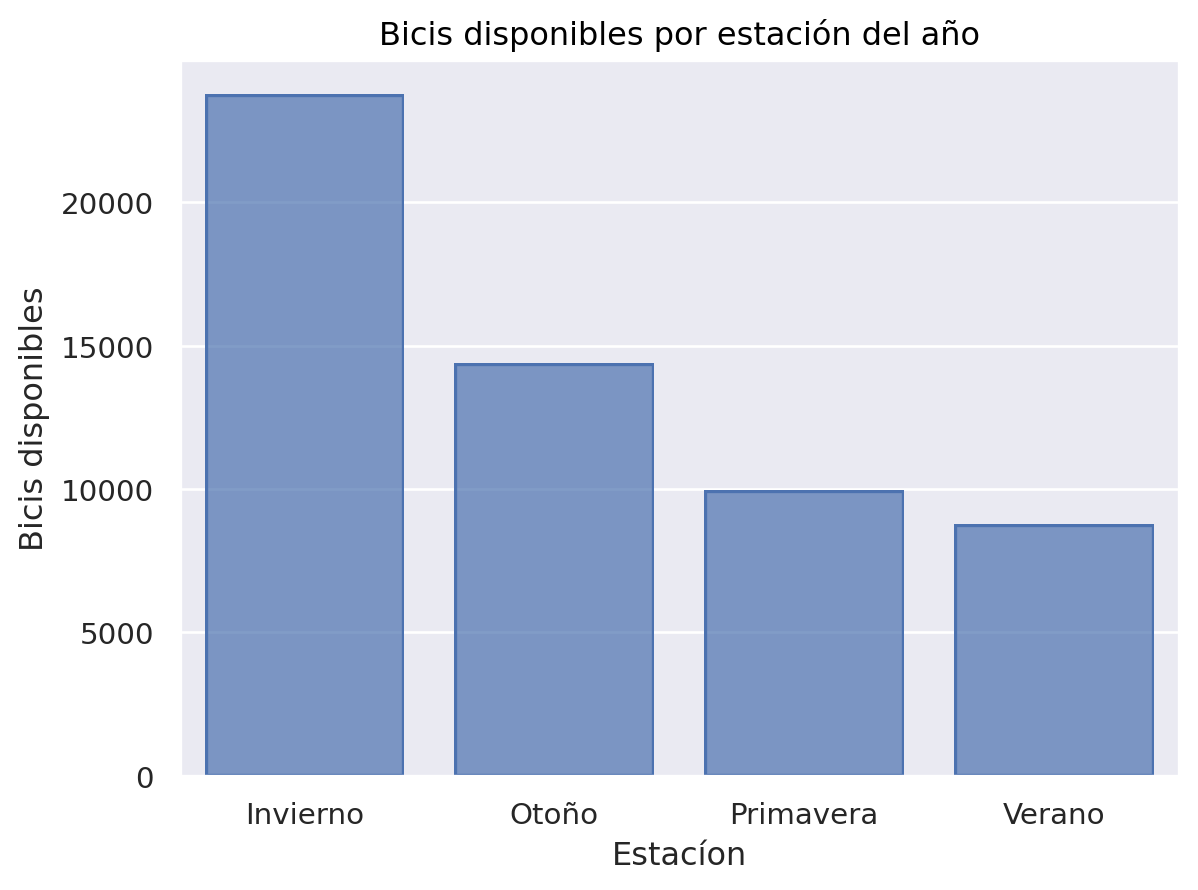

In [29]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Bicis disponibles")
)

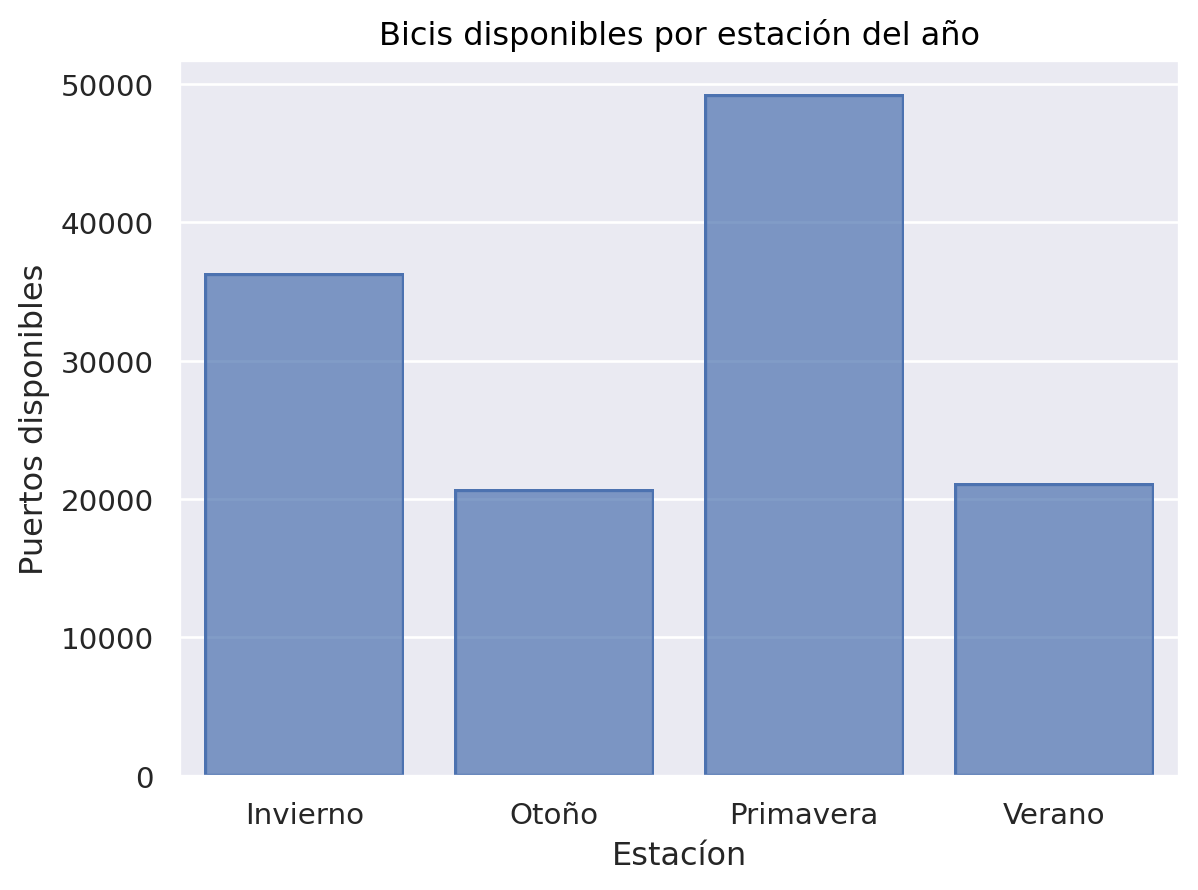

In [30]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_puertos_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Puertos disponibles")
)

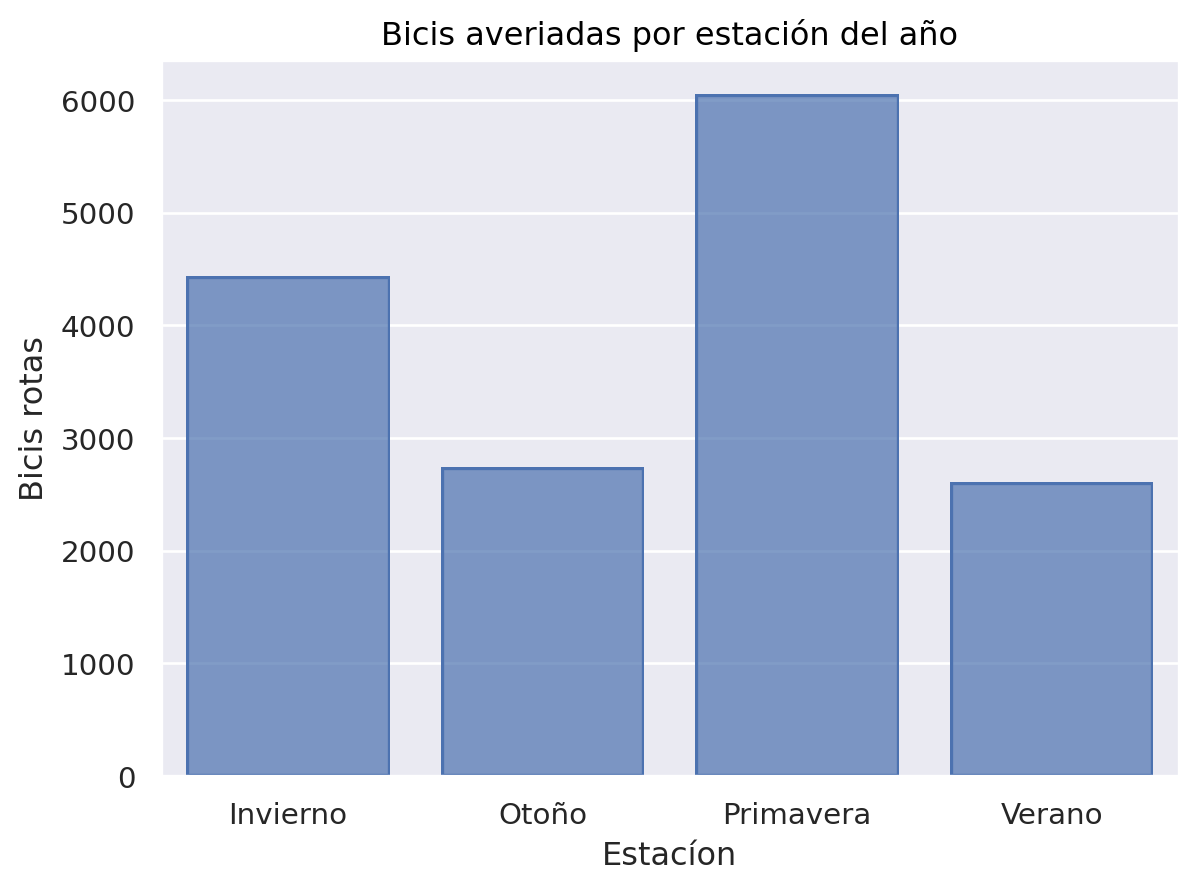

In [31]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_rotas")
    .add(so.Bar())
    .label(title="Bicis averiadas por estación del año",x="Estacíon",y="Bicis rotas")
)

11. A continuacion veremos como varia la cantidad promedio de bicis y
    puertos disponibles por hora y dia de la semanaa?


In [32]:
# Promedios por día de la semana y hora:

cantidades_promedios=(datos_agrupados
      .groupby(["dia_semana","hora"],as_index=False)
      [["cantidad_puertos_disponibles","cantidad_bicis_disponibles"]]
      .agg("mean").round())

# Cambiamos el nombre de las columnas:

nuevos_nombres=(
    {"cantidad_puertos_disponibles":"cantidad_puertos_disponibles(promedio)","cantidad_bicis_disponibles":"cantidad_bicis_disponibles(promedio)"}
)

cantidades_promedios = cantidades_promedios.rename(columns=nuevos_nombres)


In [33]:
#Para que el gráfico no los ponga en orden alfabético:


cantidades_promedios

dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

cantidades_promedios["dia_semana"] = pd.Categorical(
    cantidades_promedios["dia_semana"],
    categories=dias, ordered=True
)

In [34]:
# Fijo la escala vertical para todos los paneles, así evito posibles deformaciones como consecuencia de que cada panel se ajuste por su rango:

min_bicis = cantidades_promedios["cantidad_bicis_disponibles(promedio)"].min()
max_bicis = cantidades_promedios["cantidad_bicis_disponibles(promedio)"].max()

min_puertos = cantidades_promedios["cantidad_puertos_disponibles(promedio)"].min()
max_puertos = cantidades_promedios["cantidad_puertos_disponibles(promedio)"].max()


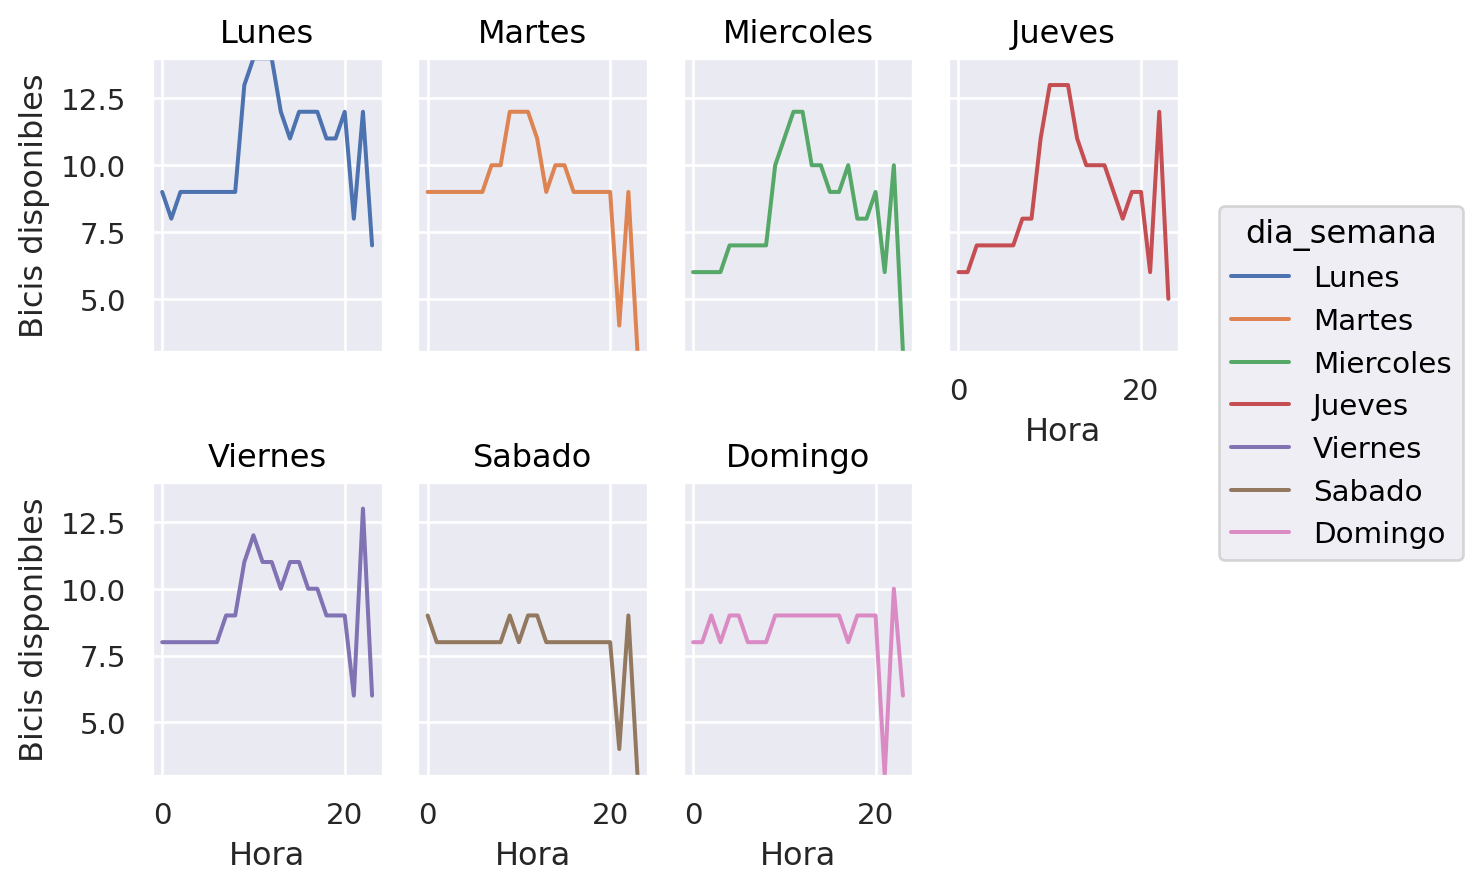

In [35]:
# Gráficamos la cantidad promedio de bicis disponibles para cada día de la semana:

(
    so.Plot(
        cantidades_promedios,
        x = "hora",
        y = "cantidad_bicis_disponibles(promedio)",
        color="dia_semana"
    )
    .facet(col="dia_semana", wrap=4) #esto es para que me muestre 4 gráficos separados y luego cambie de linea
    .add(so.Line())
    .limit(y=(min_bicis, max_bicis))
    .label(x="Hora",y="Bicis disponibles")
)


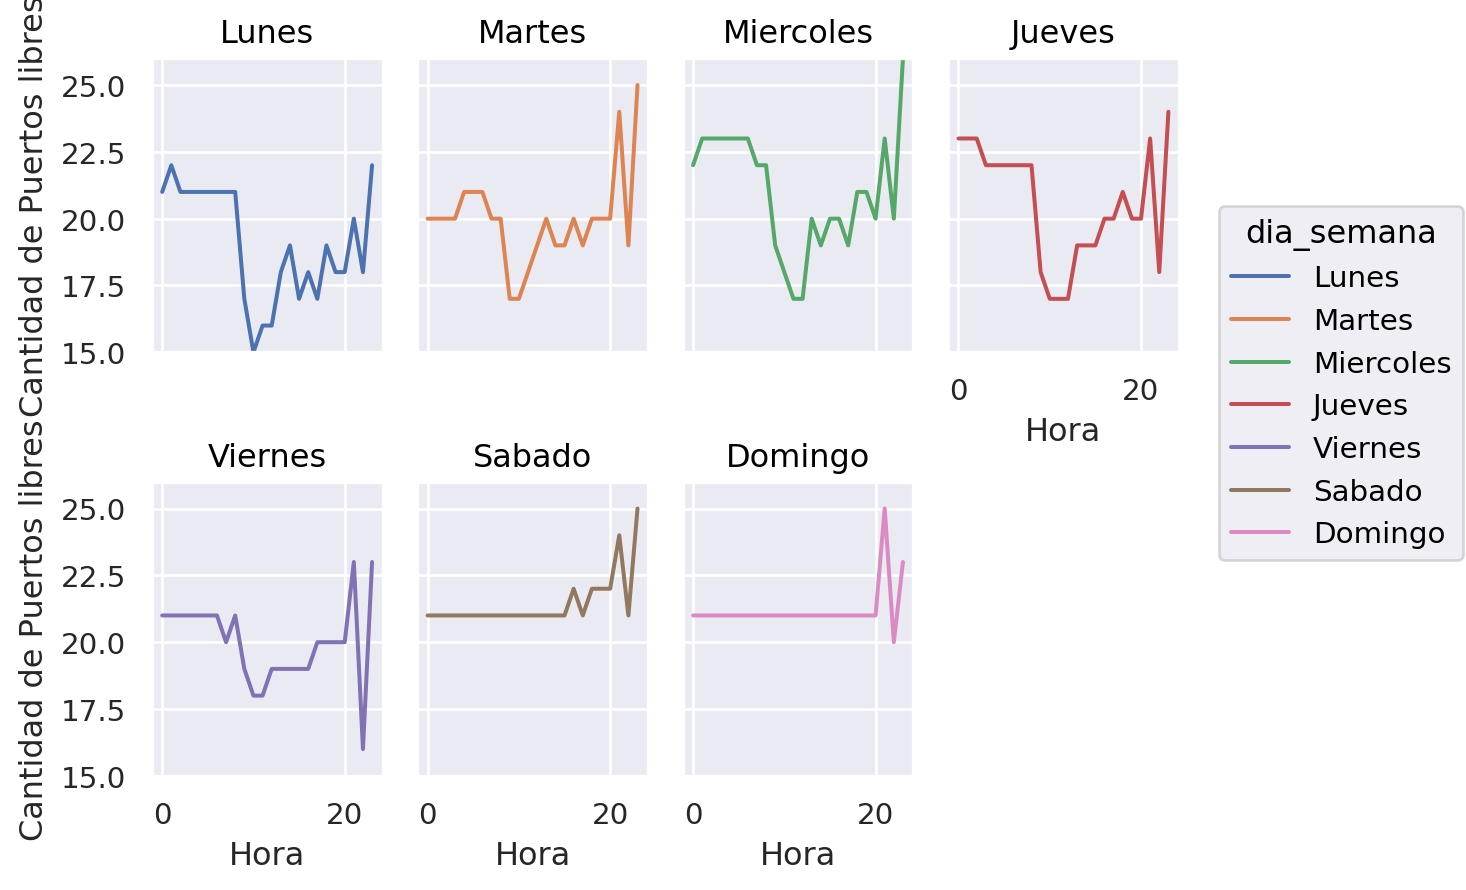

In [36]:
# Gráficamos la cantidad promedio de puertos disponibles para cada día de la semana:

(
    so.Plot(data = cantidades_promedios,x = "hora", y = "cantidad_puertos_disponibles(promedio)",color="dia_semana")
    .facet(col="dia_semana", wrap=4)
    .add(so.Line())
    .limit(y=(min_puertos, max_puertos))
    .label(x="Hora",y="Cantidad de Puertos libres")
)

A partir de los gráficos se observa que durante los días hábiles
(De lunes a viernes) la cantidad promedio de bicicletas disponibles
disminuye marcadamente en horas de la mañana, coincidiendo con
los horarios de ingreso a las actividades académicas y laborales.

Posteriormente se observa una recuperación hacia el mediodía,
y en algunos casos una nueva disminución por la tarde.

Los puertos disponibles presentan el comportamiento inverso,
lo cual es consistente con el uso del sistema.

Durante los fines de semana el patrón es considerablemente
más estable, sin caídas pronunciadas, lo que sugiere
una menor demanda del sistema.

Esta tendencia puede explicarse por el carácter académico
de Ciudad Universitaria, donde el uso del sistema está
fuertemente asociado a los horarios de cursada.


12. En los gráficos que realizaste hay algunos valores que parezcan incorrectos o mal medidos?
¿Cómo lo podrías justificar?


En los gráficos se observan algunas variaciones abruptas, especialmente en las últimas horas del día, donde se registran
caídas o aumentos pronunciados en la cantidad de bicicletas
y puertos disponibles.

Por ejemplo, el martes la cantidad promedio de bicicletas disponibles
desciende de aproximadamente 9–10 bicicletas a solo 3–4 alrededor de
las 22–23 hs. Algo similar ocurre el domingo, donde se mantiene cerca
de 9 bicicletas durante el día y cae abruptamente a alrededor de 3 en
la última franja horaria.

En el caso de los puertos disponibles, el miércoles se observa un salto
desde aproximadamente 17 hasta más de 26 puertos libres en la última
hora del día. También el viernes presenta una caída marcada cercana a
los 16 puertos seguida de un aumento abrupto.

Las caídas abruptas observadas alrededor de las 22–23 hs pueden
explicarse por el horario de finalización de clases en Ciudad
Universitaria. En ese momento, una gran cantidad de personas
retira bicicletas para regresar a sus hogares.

Esto provoca una disminución marcada en la cantidad de bicicletas
disponibles y, simultáneamente, un aumento en la cantidad de puertos
libres, ya que las bicicletas dejan de estar ancladas.


# Análisis exploratorio

Con el objetivo de comprender la dinámica de uso del sistema de bicicletas en Ciudad Universitaria, se realiza un análisis exploratorio centrado en la evolución temporal de la disponibilidad de bicicletas.

Dado que una menor cantidad de bicicletas disponibles implica un mayor uso del sistema, se utilizará el promedio de bicicletas disponibles como indicador indirecto del nivel de demanda.

Se analizarán patrones temporales semanales y mensuales, diferencias entre días hábiles y fines de semana, medidas de dispersión y una regresión lineal simple para evaluar posibles tendencias temporales.

In [37]:
# ¿Cuáles son las semanas con mayor uso de bicis?

# Creo una variable semana

# Sumo la cantidad total de bicis usadas por semana

# Grafico la evolución

# Identifico picos

# Lo relaciono con inicio de cuatrimestres

In [38]:
datos_agrupados["semana"] = datos_agrupados["fecha"].dt.isocalendar().week

# Para analizar el uso semanal de las bicis necesitamos identificar a qué semana pertenece cada fecha. Como la variable fecha ya está en formato datetime (la transformación se usó en Análisis Descriptivo),
# utilizamos el método .dt.isocalendar().week para extraer el número de semana correspondiente a cada observación.
# Busqué y hace parte de lo que se había usado en la conversión de fecha a date time.
# Utilizamos las herramientas de manipulación de fechas que ofrece pandas para poder agrupar los datos temporalmente.

In [39]:
# Para el uso semanal, con el promedio de cantidad de bicis disponibles:

uso_semanal = (
    datos_agrupados
    .groupby("semana", as_index=False)
    .agg({
        "cantidad_bicis_disponibles": "mean"
    })
)

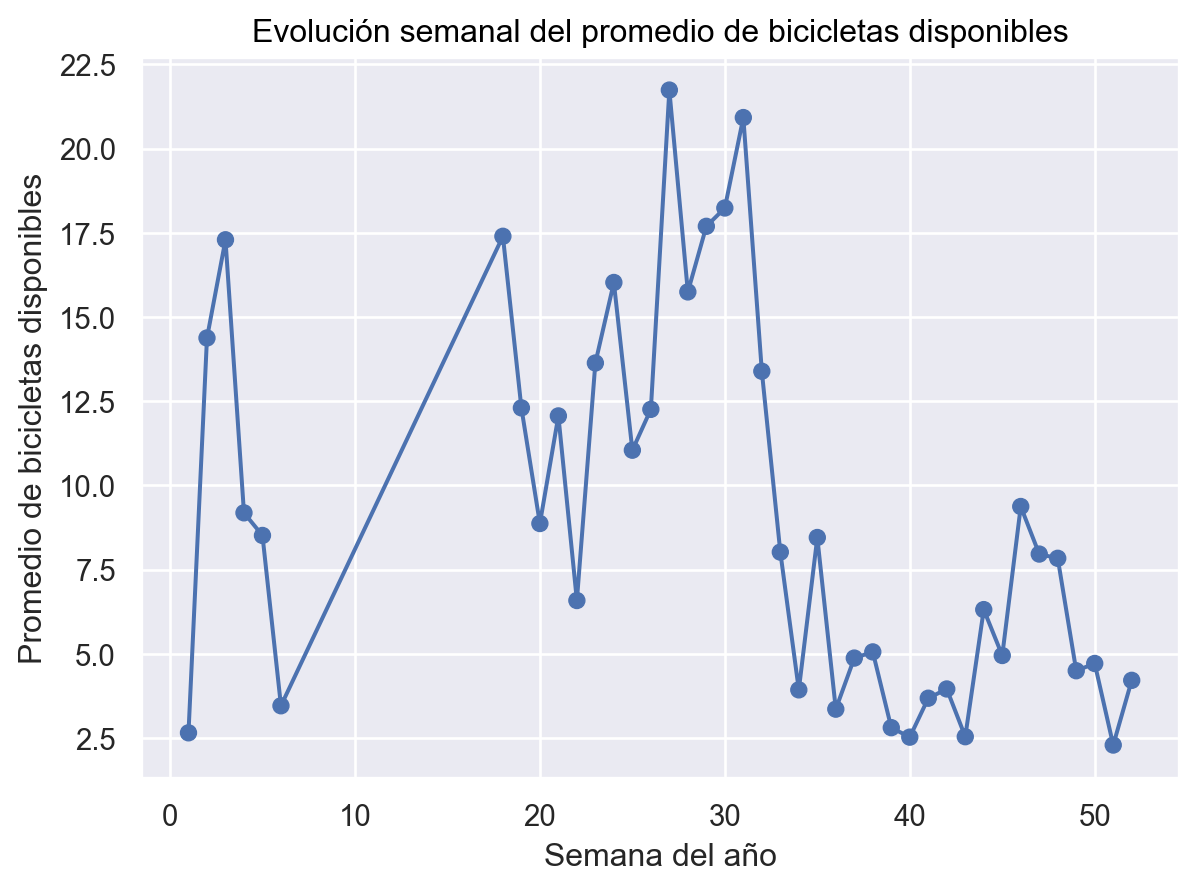

In [ ]:
# Graficamos el uso semanal:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(so.Dot())
    .label(
        x="Semana del año",
        y="Promedio de bicicletas disponibles",
        title="Evolución semanal del promedio de bicicletas disponibles"
    )
)

In [ ]:
# Para ver las semanas con menor disponibilidad de bicis (es decir, cuando hay un mayor uso de las mismas):

uso_semanal.sort_values("cantidad_bicis_disponibles").head()

,semana,cantidad_bicis_disponibles
39,51,2.290323
28,40,2.525000
31,43,2.537975
0,1,2.653595
27,39,2.806452


In [ ]:
# # Para las semanas con mayor disponibilidad de bicis (es decir, cuando hay un menor uso de las mismas):

uso_semanal.sort_values("cantidad_bicis_disponibles", ascending=False).head()

,semana,cantidad_bicis_disponibles
15,27,21.738462
19,31,20.922078
18,30,18.236842
17,29,17.692810
6,18,17.397059


Se observan fluctuaciones significativas en la disponibilidad promedio a lo largo del año, lo que sugiere que el uso del sistema no es uniforme y presenta períodos de mayor y menor demanda.

In [ ]:
# hay que responder con más herramientas y argumentos la pregunta de:

# ¿Corresponden con los inicios de los cuatrimestres de la FCEyN / FADU / CBC?


In [ ]:
# Puedo dentificar explícitamente las semanas de inicio de cuatrimestre,
# compararlas con el resto del año,
# visualizarlo en un gráfico donde se vea claramente la diferencia
# y agregar una comparación numérica simple (como loss promedios).

# Lo hago mas adelante

Analizamos los dias hábiles vs findes:

In [ ]:
# Creo variables indicadoras que me servirán:

datos_agrupados["dia_semana"] = datos_agrupados["fecha"].dt.dayofweek
datos_agrupados["fin_de_semana"] = datos_agrupados["dia_semana"] >= 5

In [ ]:
# Acá acabo de entrar en pánico. En los primeros puntos se usan comandos para pasar la fecha de object a datetime. Eso lo había buscado online. Hay comandos en ese mismo grupo dt como dayofweek o dayofmonth.
# Pero entré en pánico porque no sé si sea problematico usar eso que no vimos en clase, estrictamente. Es una boludez menor, capaz, pero no sé. Será que está prohibido?
# Tocaría re hacer todo D:
# Finjo demencia y sigo. Mañana lo hablamos:


In [ ]:
# Estadísticos para comparar los días:

comparacion_dias = (
    datos_agrupados
    .groupby("fin_de_semana")
    ["cantidad_bicis_disponibles"]
    .agg(["mean", "std"])
)

comparacion_dias

,mean,std
fin_de_semana,,
False,9.317246,7.266476
True,8.496279,7.631952


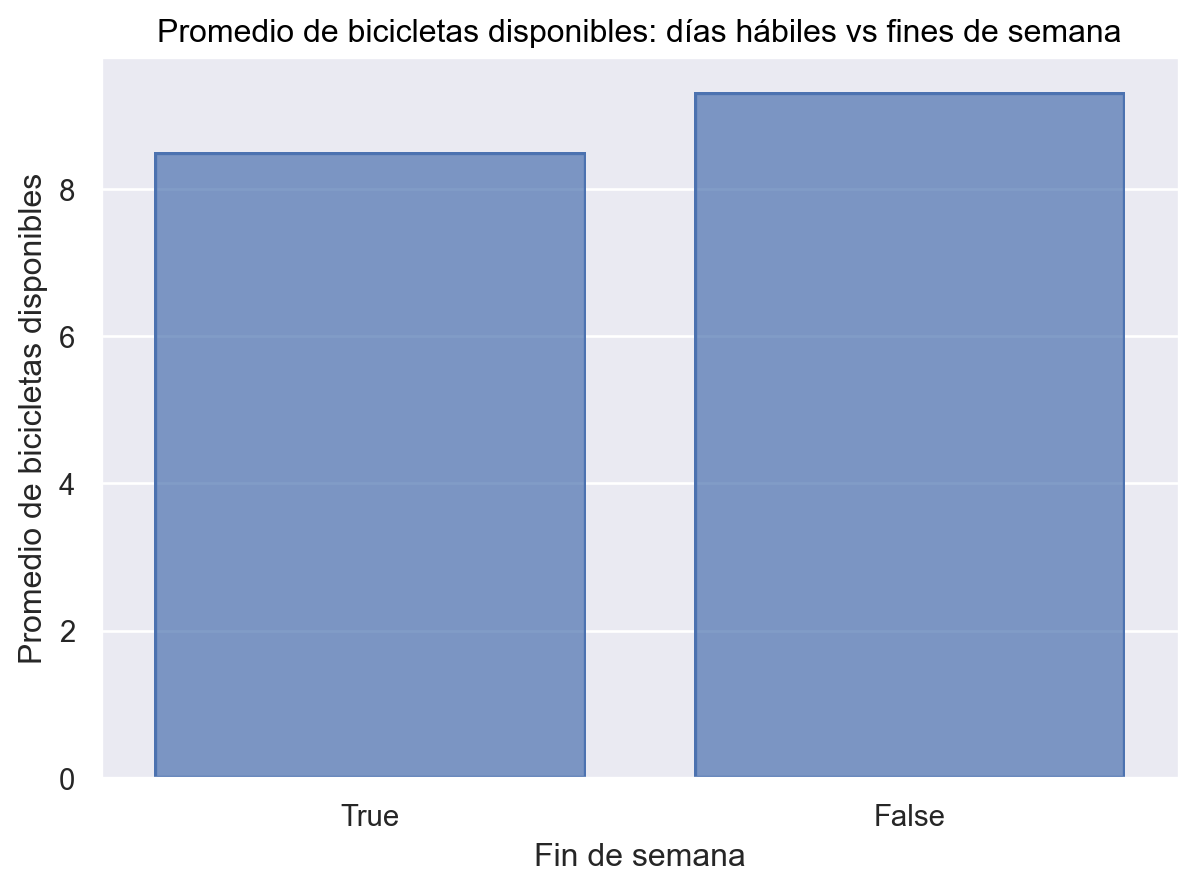

In [ ]:
(
    so.Plot(
        datos_agrupados,
        x="fin_de_semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Bar(), so.Agg("mean"))
    .label(
        x="Fin de semana",
        y="Promedio de bicicletas disponibles",
        title="Promedio de bicicletas disponibles: días hábiles vs fines de semana"
    )
)

Uso mensual:

In [ ]:
uso_mensual = (
    datos_agrupados
    .groupby("mes")
    ["cantidad_bicis_disponibles"]
    .agg(["mean", "std"])
)

uso_mensual

,mean,std
mes,,
1,11.212575,6.982073
2,4.036036,2.335216
4,16.130435,6.035483
5,11.237216,7.120921
6,13.058104,6.250978
7,18.249622,5.334538
8,9.941945,7.356938
9,4.026588,4.197337
10,3.830725,4.955479


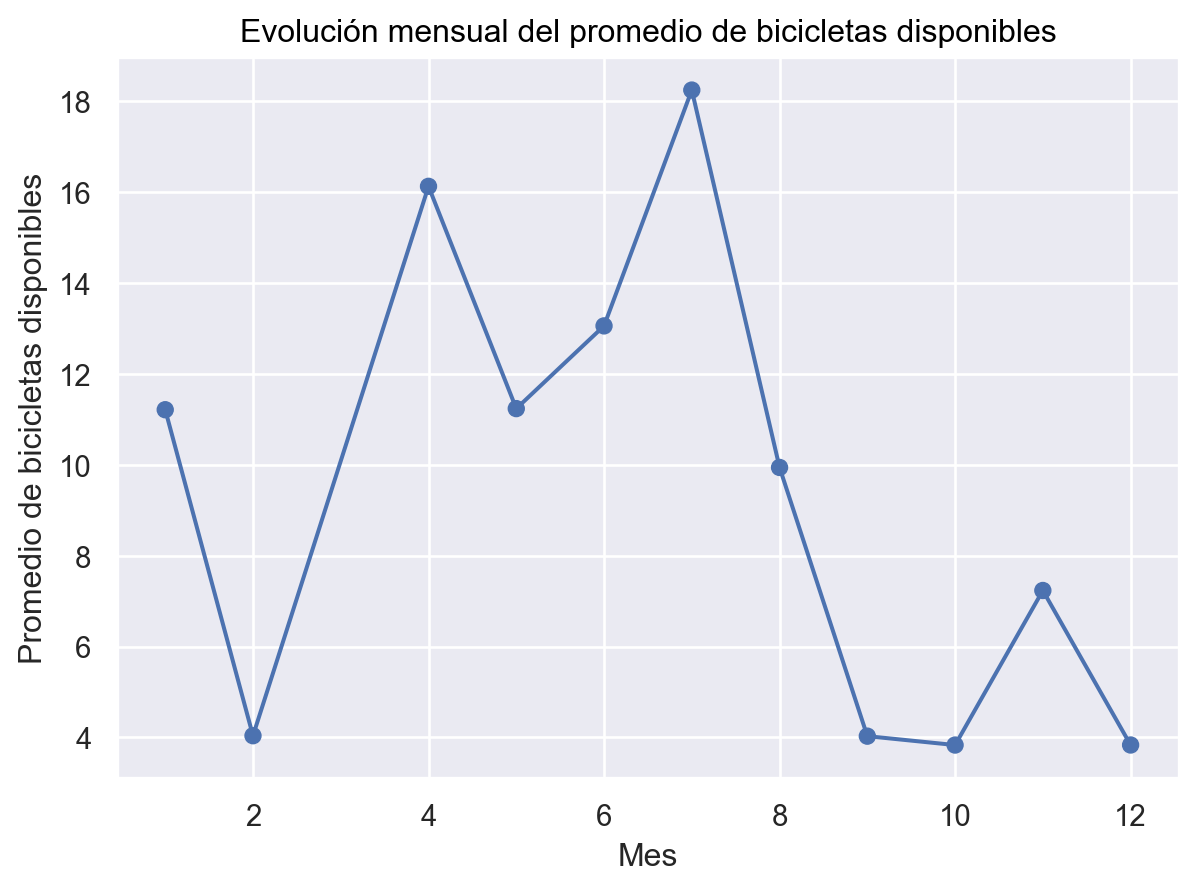

In [ ]:
(
    so.Plot(
        datos_agrupados,
        x="mes",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line(), so.Agg("mean"))
    .add(so.Dot(), so.Agg("mean"))
    .label(
        x="Mes",
        y="Promedio de bicicletas disponibles",
        title="Evolución mensual del promedio de bicicletas disponibles"
    )
)

Inicio de cuatris:

In [ ]:
# Creamos una variable boolena (True/False) que indique si es una semana de inicio de cuatrimestre:

# Usamos como criterio: - Inicio 1er cuatrimestre: semanas 9 a 12 - Inicio 2do cuatrimestre: semanas 31 a 34

uso_semanal["inicio_cuatrimestre"] = uso_semanal["semana"].isin([9,10,11,12,31,32,33,34])

In [ ]:
uso_semanal.head()

,semana,cantidad_bicis_disponibles,inicio_cuatrimestre
0,1,2.653595,False
1,2,14.377483,False
2,3,17.293333,False
3,4,9.185430,False
4,5,8.513514,False


In [ ]:
uso_semanal

,semana,cantidad_bicis_disponibles,inicio_cuatrimestre
0,1,2.653595,False
1,2,14.377483,False
2,3,17.293333,False
3,4,9.185430,False
4,5,8.513514,False
5,6,3.456522,False
6,18,17.397059,False
7,19,12.301887,False
8,20,8.867925,False
9,21,12.062893,False


In [ ]:
# Comparo promedios:

uso_semanal.groupby("inicio_cuatrimestre")["cantidad_bicis_disponibles"].mean()

inicio_cuatrimestre
False     8.877160
True     11.565019
Name: cantidad_bicis_disponibles, dtype: float64

C:\Users\Famil\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<IntegerArray>
[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,   31,   32,   33,   34, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>]
Length: 41, dtype: UInt32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])


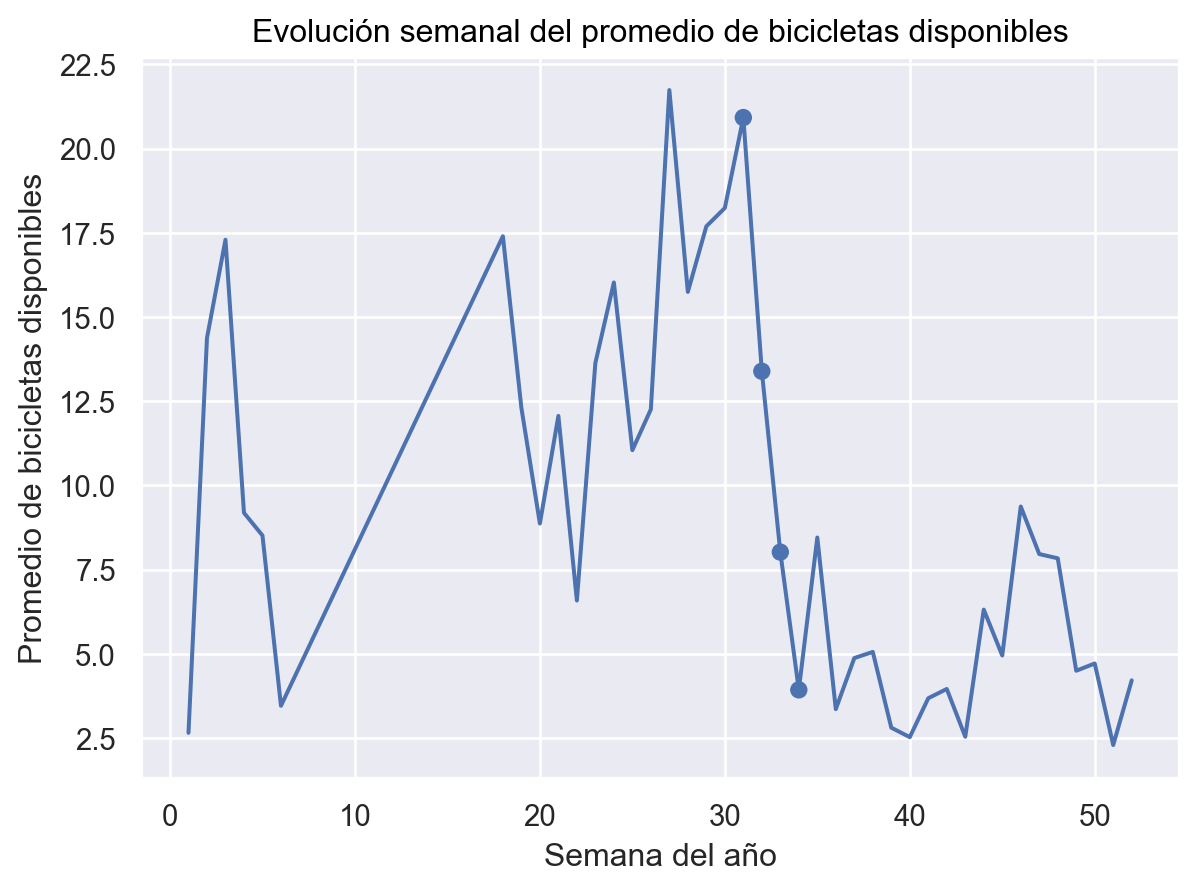

In [ ]:
# Graficamos el uso semanal, con los inicios de cuatrimestre como Puntos para distinguirlo:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(
        so.Dot(),
        data=uso_semanal[uso_semanal["inicio_cuatrimestre"] == True]
    )
    .label(
        x="Semana del año",
        y="Promedio de bicicletas disponibles",
        title="Evolución semanal del promedio de bicicletas disponibles"
    )
)

In [ ]:
# No me está marcando los puntos de inicio del primer cuatri!!!

In [ ]:
uso_semanal[uso_semanal["inicio_cuatrimestre"] == True]

,semana,cantidad_bicis_disponibles,inicio_cuatrimestre
19,31,20.922078,True
20,32,13.389610,True
21,33,8.019355,True
22,34,3.929032,True


In [ ]:
uso_semanal["semana"].min(), uso_semanal["semana"].max()

(1, 52)

In [ ]:
datos_agrupados[datos_agrupados["mes"] == 3]["semana"].unique()

<IntegerArray>
[]
Length: 0, dtype: UInt32

Se intentó identificar tanto el inicio del primer como del segundo cuatrimestre. Sin embargo, el dataset no contiene registros correspondientes al mes de marzo, por lo que únicamente se pudo analizar el inicio del segundo cuatrimestre (agosto).

In [ ]:
datos_agrupados["mes"].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2])

Entonces...desde el principio, análisis de inicio de cuatri: Dado que el dataset no incluye marzo, se analiza el inicio del segundo cuatrimestre.



In [ ]:
semanas_inicio = [31, 32, 33, 34]

uso_semanal["inicio_cuatrimestre"] = uso_semanal["semana"].isin(semanas_inicio)

In [ ]:
# Promedio y desviación para comparar:

comparacion_cuatrimestre = (
    uso_semanal
    .groupby("inicio_cuatrimestre")
    ["cantidad_bicis_disponibles"]
    .agg(["mean", "std"])
)

comparacion_cuatrimestre

,mean,std
inicio_cuatrimestre,,
False,8.877160,5.509324
True,11.565019,7.343108


C:\Users\Famil\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<IntegerArray>
[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,   31,   32,   33,   34, <NA>, <NA>, <NA>,
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 <NA>, <NA>]
Length: 41, dtype: UInt32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])


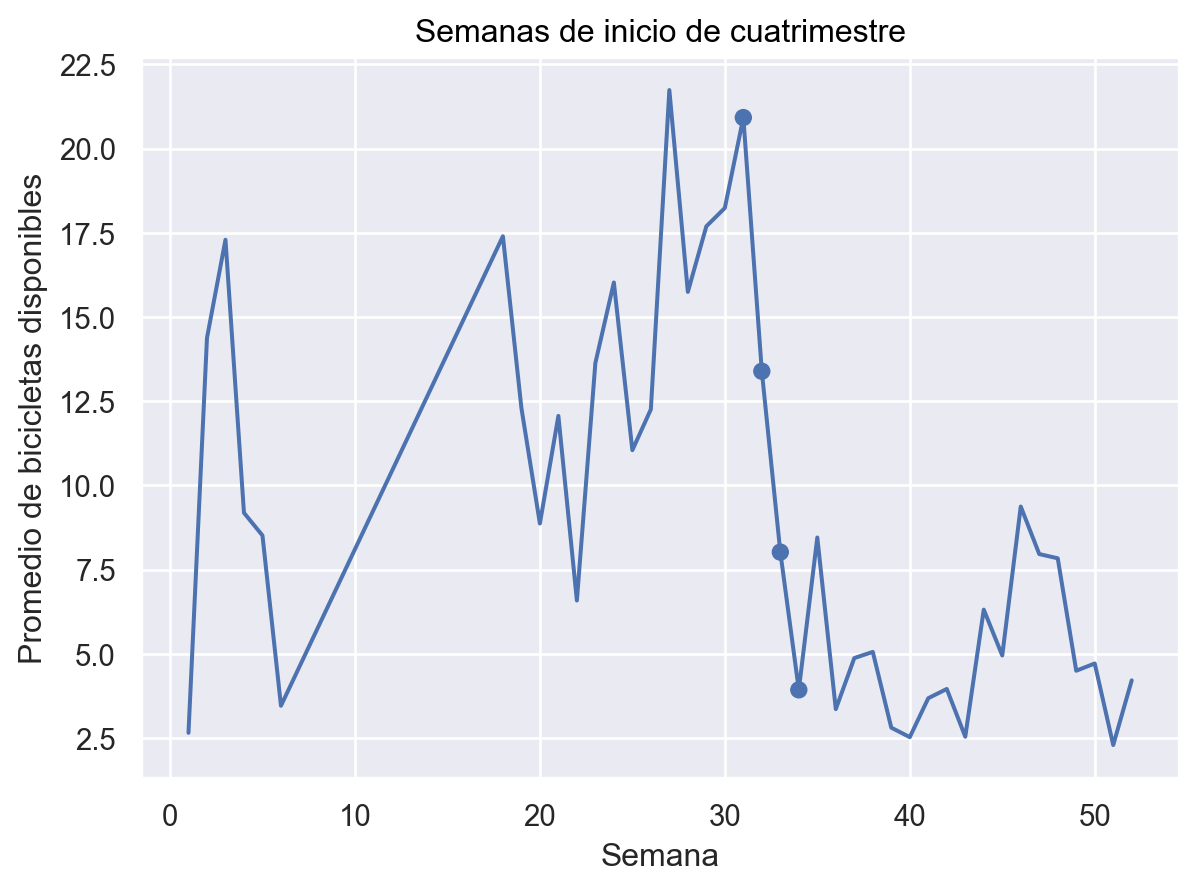

In [ ]:
# Grafico, puntos en las semanas de inicio:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(
        so.Dot(),
        data=uso_semanal[uso_semanal["inicio_cuatrimestre"] == True]
    )
    .label(
        x="Semana",
        y="Promedio de bicicletas disponibles",
        title="Semanas de inicio de cuatrimestre"
    )
)

 Vamos a analizar como variables climaticas afectan , si lo hacen, el uso de las bicis, sería logico pensar que los dias donde la velocidad del viento es alto o las temperaturas estan por fuera de cierto rango, las personas optarian por otro medio de transporte que los resguarde de estas condiciones "adversas"

In [ ]:
#cargamos el archivo y damos una mirada
df_clima=pd.read_csv("clima.csv")
df_clima.head()

,Unnamed: 0,fecha,tavg,tmin,tmax,prcp,wspd,pres,fecha_relativa
0,0,2025-03-01,24.7,21.5,27.4,0.0,10.8,1009.8,-58
1,1,2025-03-02,23.4,21.0,24.7,13.7,16.8,1015.0,-57
2,2,2025-03-03,23.5,19.3,25.3,29.8,12.5,1013.7,-56
3,3,2025-03-04,24.9,21.1,27.2,19.1,19.3,1012.7,-55
4,4,2025-03-05,27.8,23.6,31.1,15.0,9.8,1010.0,-54


In [ ]:
df_clima[["Unnamed: 0"]] # vemos que esta columna no nos aporta informacion así que la tiramos

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
301,301
302,302
303,303
304,304


Vamos a ver que informacion nos da cada columna:
"Unanamed: 0" es lo mismo que el index, asi que tiro esta columna ,tavg nos habla de la temperatura promedio del dia
,tmin y tmax nos dicen la temperatura maxima y minima del dia de relacionado a la "fecha",
la columna prcp nos da cuenta de las precipitaciones y pres de la presion atmosferica de ese dia
-

In [ ]:
#miramos la cantidad de valores nulos y en que columna
df_clima.isnull().sum()

Unnamed: 0        0
fecha             0
tavg              0
tmin              0
tmax              0
prcp              7
wspd              0
pres              0
fecha_relativa    0
dtype: int64

Como la primer columna("Unnamed: 0") y la ultima("fecha_relativa") no nos dan informacion relevante respecto a variables climaticas, las eliminamos
-

In [ ]:
df_clima=df_clima.drop(columns=["Unnamed: 0","fecha_relativa"])

In [ ]:
#Elimino los datos faltantes de df_clima
df_clima=df_clima.dropna()
df_clima.isna().sum()

fecha    0
tavg     0
tmin     0
tmax     0
prcp     0
wspd     0
pres     0
dtype: int64

Ahora la idea es unir los df de 'datos_limpios' con el 'df_clima' para poder buscar una correlacion entre la cantidad de bicis con variables climaticas, antes de unirlas debo pasar la columna "fecha" de "df_clima" al mismo tipo que la columna fecha del df de las bicis
-

In [ ]:
df_clima["fecha"]=pd.to_datetime(df_clima["fecha"])

In [ ]:
#vemos que ambas columnas tienen el mismo tipo de datos , esto para luego "mergearlas" usando esta columna de referencia
datos_limpios["fecha"].dtype==df_clima["fecha"]

True

In [ ]:
#recordamos con una mirada rápida lo que era el dataframe de datos limpios
datos_limpios.head(3)

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,2026-02-21 23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,2026-02-21 23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,2026-02-21 00:32:59,Martes,2025,4,29,0,Otoño


Vamos a definir una nueva variable, un df que contenga los valores mas importantes para la fusión con "df_clima" y su posterior análisis, esta nueva variable contendra la fecha, dia_semana, estacion_anio y un la suma de las bicis disponibles, puertos disponibles y bicis rotas de ambas estaciones
-

In [ ]:
datos_bicis=(
    datos_limpios
    .groupby(["fecha","dia_semana","estacion_anio"],as_index=False) #agrupo por fecha y conservo las otras columnas
    [["bicis_disponibles","puertos_disponibles","bicis_rotas"]] #a estas columnas les voy a aplicar la funcion 'agg'
    .agg("sum") # sumo los valores de cada columna mencionada por la agrupación impuesta annteriormente
)
datos_bicis.head()

,fecha,dia_semana,estacion_anio,bicis_disponibles,puertos_disponibles,bicis_rotas
0,2025-04-28,Lunes,Otoño,14,15,3
1,2025-04-29,Martes,Otoño,415,208,113
2,2025-04-30,Miercoles,Otoño,313,237,154
3,2025-05-01,Jueves,Otoño,472,81,183
4,2025-05-02,Viernes,Otoño,391,252,93


Uno ambos dataframe usando la columna "fecha" como referencia, eliminando las filas que no coinciadan, para esto usamos "how=inner", este comando une las bases de datos manteniendo las filas que estan contenidas en la columna de referencia "fecha", luego digo que los indices no me los guarde como una columna con el drop

In [ ]:
bicis_y_clima=pd.merge(datos_bicis,df_clima,on="fecha",how="inner").reset_index(drop=True)
bicis_y_clima

,fecha,dia_semana,estacion_anio,bicis_disponibles,puertos_disponibles,bicis_rotas,tavg,tmin,tmax,prcp,wspd,pres
0,2025-04-28,Lunes,Otoño,14,15,3,16.9,12.3,22.5,0.0,5.6,1017.5
1,2025-04-29,Martes,Otoño,415,208,113,16.6,11.8,21.5,0.0,6.3,1017.4
2,2025-04-30,Miercoles,Otoño,313,237,154,18.0,13.3,21.1,0.0,8.9,1017.1
3,2025-05-01,Jueves,Otoño,472,81,183,18.2,15.3,21.2,0.0,13.7,1016.6
4,2025-05-02,Viernes,Otoño,391,252,93,19.0,15.6,21.6,0.0,4.7,1016.9
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2025-12-27,Sabado,Verano,150,417,105,29.2,25.0,35.0,0.1,14.5,1007.4
244,2025-12-28,Domingo,Verano,174,496,34,27.7,26.0,31.0,0.0,18.5,1010.4
245,2025-12-29,Lunes,Verano,113,551,40,27.7,24.0,31.0,0.0,10.3,1010.6
246,2025-12-30,Martes,Verano,81,563,60,29.7,26.0,33.0,0.0,11.9,1009.6


En el siguiente gráfico podremos observar si hay variables explicativas que nos dan informacion parecida,
notamos que las temperaturas minimas, máximas y promedio estan intimimante relacionadas, algo que era obvio,
con esto podemos elegir cualquiera de estas para crear un modelo lineal, luego usamos como variables explicativas
a la precipitación y a la velocidad del viento, la variable a predecir será la cantidad de puertos libres,
como lo suponimos antes, esta variable tambien esta relacionada con la cantidad de bicis disponibles, si crece una, baja la otra.
La eleccion de puertos disponibles como variable explpicada se debe a que uno pensaría que si el dia anterior se usaron bicis y al otro dia
las condiciones climaticas empeoran, la cantidad de puertos disponibles deberia permanecer igual o mayor que el dia anterior.


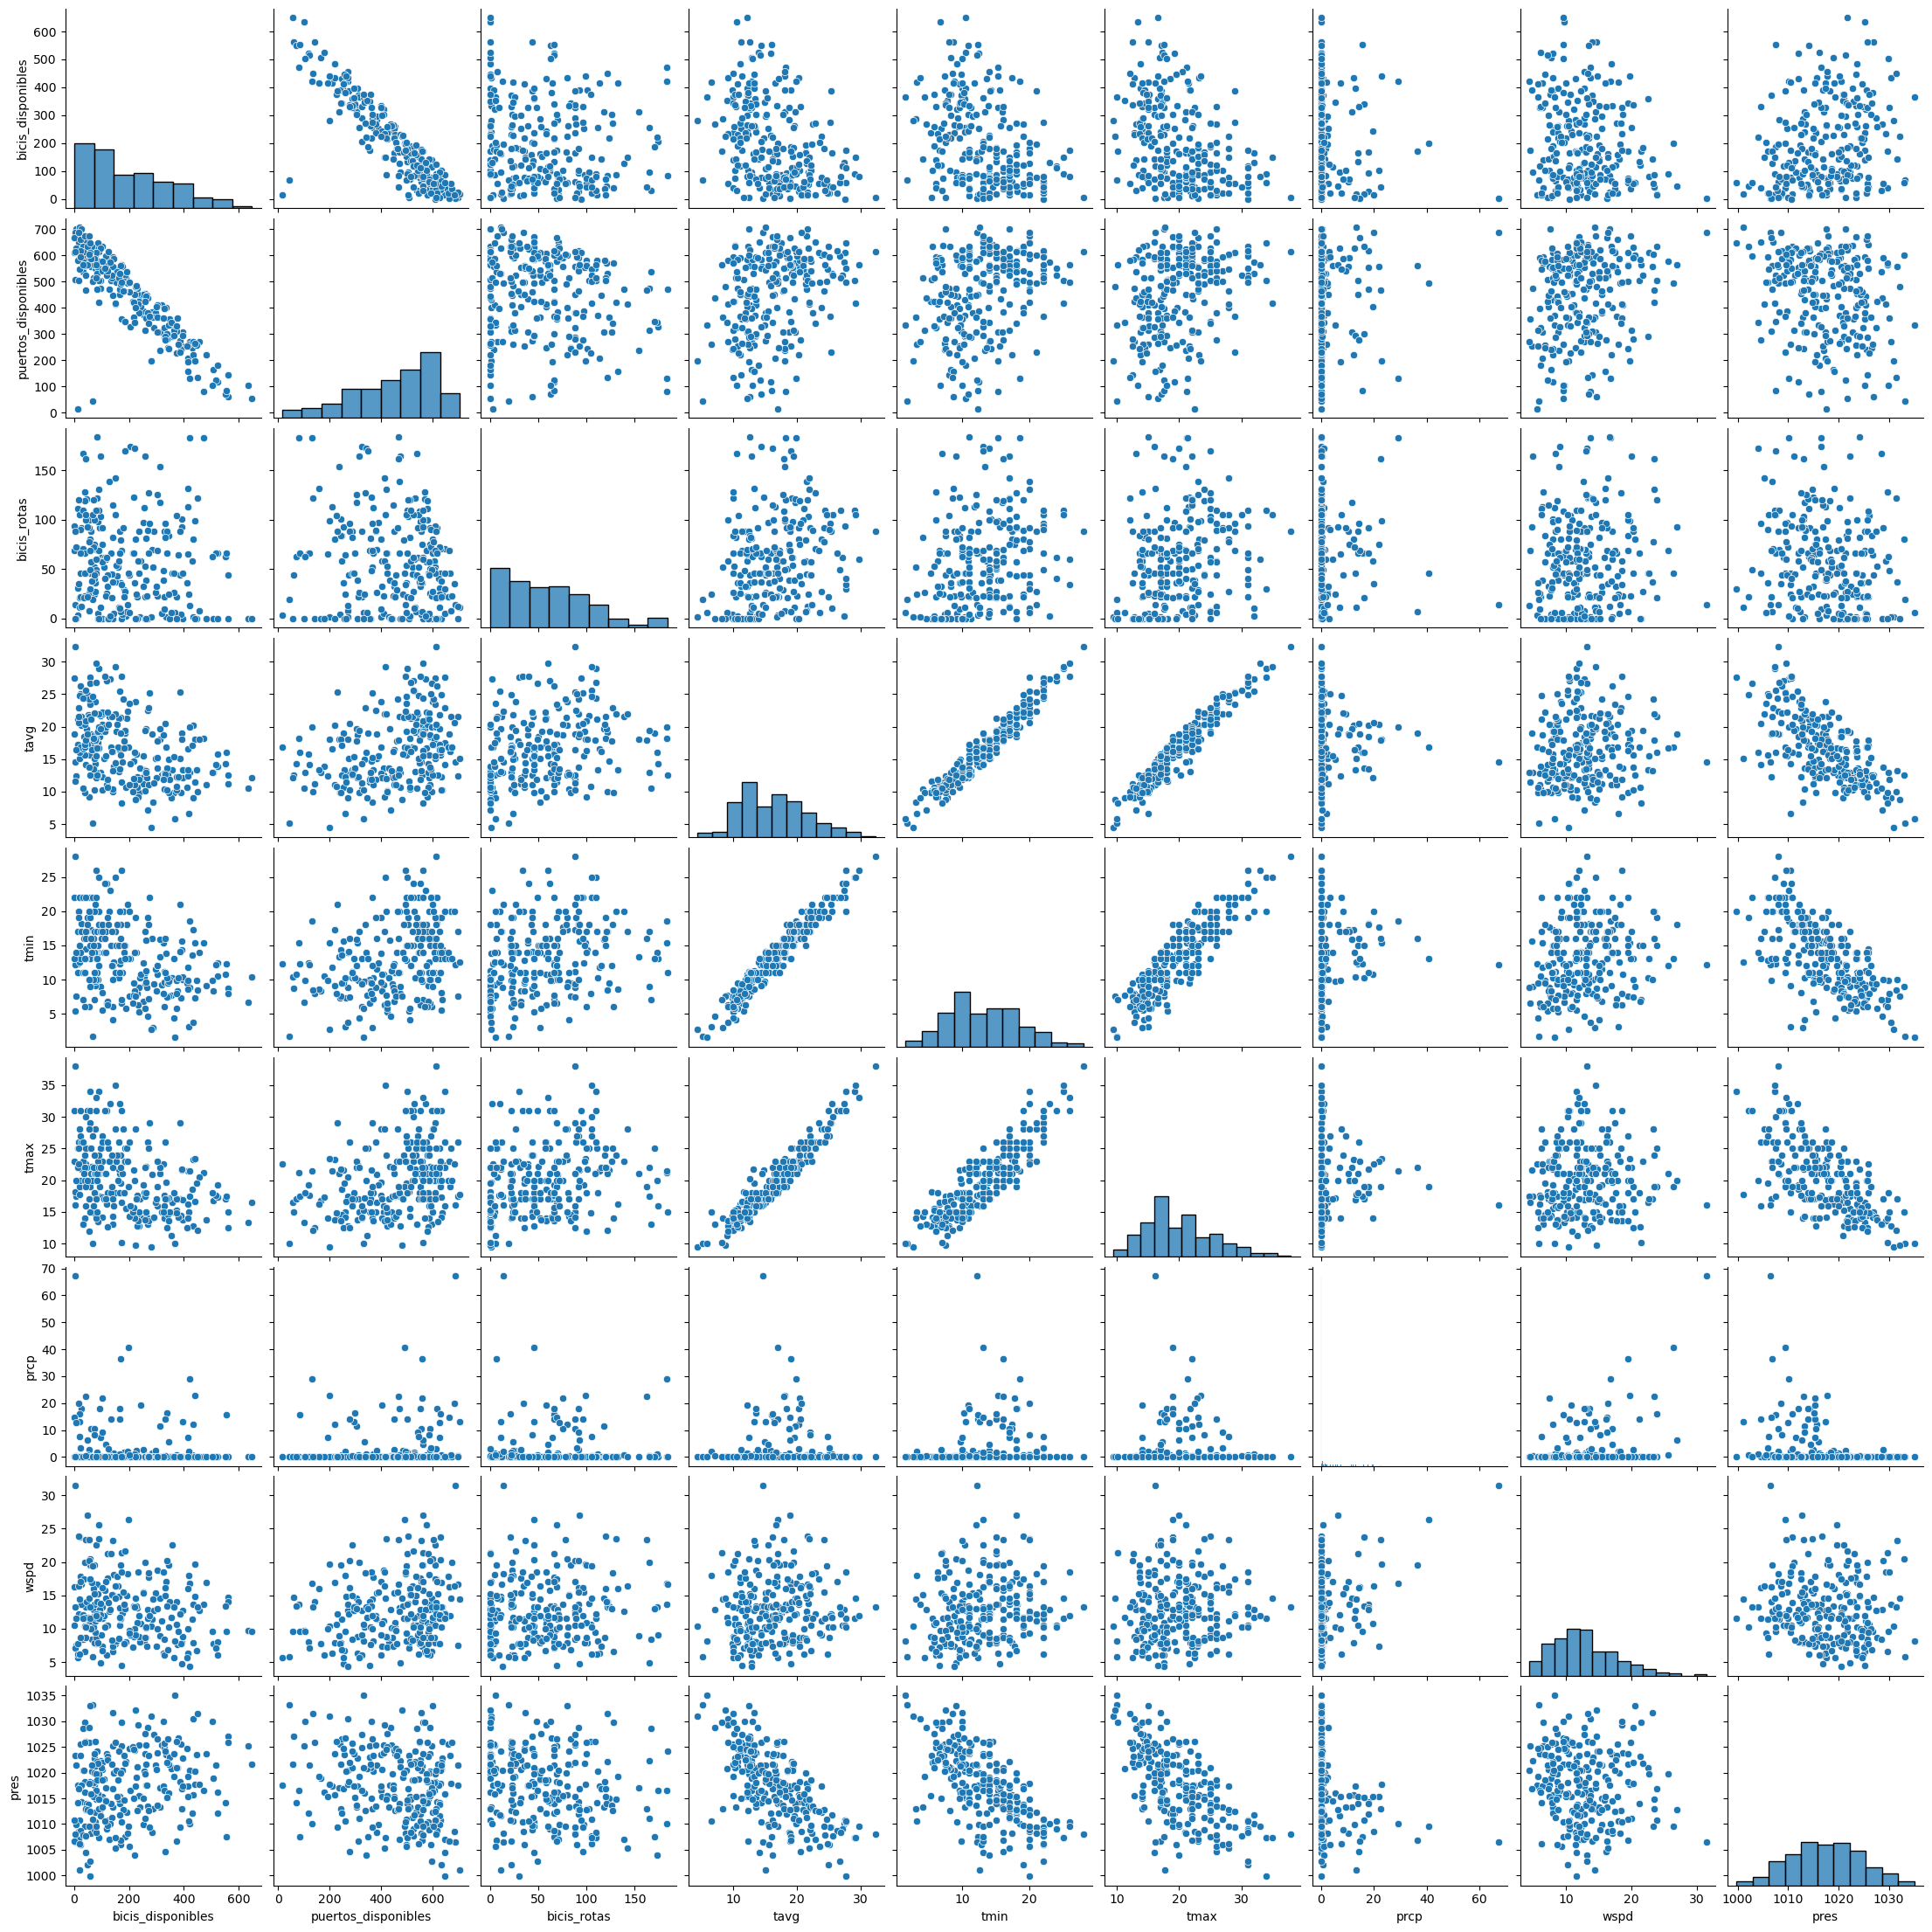

In [ ]:
sns.pairplot(bicis_y_clima)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame

In [ ]:
#usamos esto para saber el nombre correcto de cada columna
bicis_y_clima.columns

Index(['fecha', 'dia_semana', 'estacion_anio', 'bicis_disponibles',
       'puertos_disponibles', 'bicis_rotas', 'tavg', 'tmin', 'tmax', 'prcp',
       'wspd', 'pres'],
      dtype='object')

In [ ]:
var_explicativas=["tavg","prcp","wspd"]
X=bicis_y_clima[var_explicativas].copy()
X

,tavg,prcp,wspd
0,16.9,0.0,5.6
1,16.6,0.0,6.3
2,18.0,0.0,8.9
3,18.2,0.0,13.7
4,19.0,0.0,4.7
...,...,...,...
243,29.2,0.1,14.5
244,27.7,0.0,18.5
245,27.7,0.0,10.3
246,29.7,0.0,11.9


A continuacion hacemos un gráfico de cajas para ver como se distrinuyen los valores de nuestra variable
,notamos que casi todos los valores de la precipitación son cero, si reescalamos usando MinMax o la desviacion
estandar, tampoco nos arregla este problema
-

<Axes: >

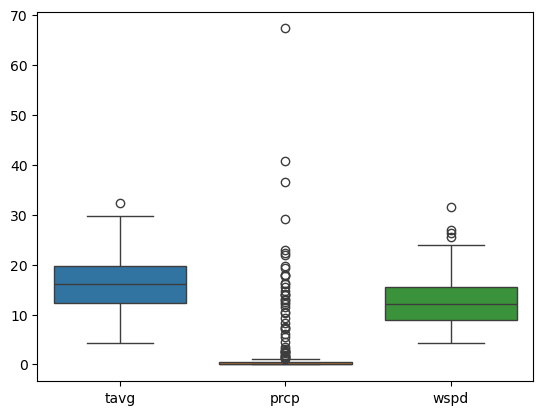

In [ ]:
sns.boxplot(X)

Podemos ver que la mayoria de datos de la columna de precipitaciones son todos cero, asi que podemos
transformar si llovio a 1 y si no llovio a 0, esto no esta tan bueno en general porque se pone en la misma bolsa
los dias con bajas y altas precipitaciones
-

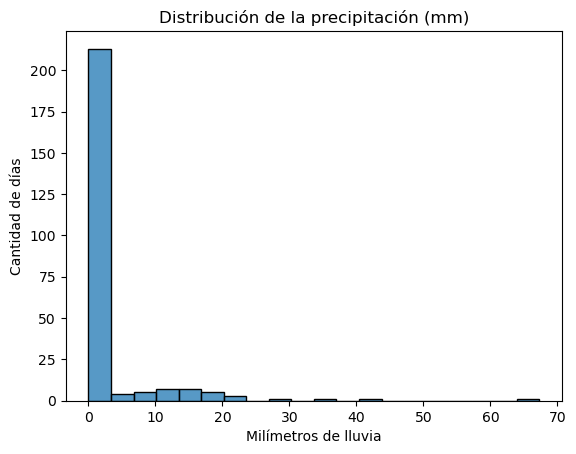

In [ ]:

sns.histplot(X["prcp"], bins=20, kde=False)

plt.title('Distribución de la precipitación (mm)')
plt.xlabel('Milímetros de lluvia')
plt.ylabel('Cantidad de días')
plt.show()

In [ ]:
X["prcp"]=(X["prcp"]>2).astype(int) #cambio esta columna a 1 y ceros dependiendo si llovió o no

In [ ]:
#miro cuantos datos nos quedo con 1 y cuantos con 0
X["prcp"].value_counts()

prcp
0    207
1     41
Name: count, dtype: int64

La mayoria de los datos de la columna precipiraciones nos quedó con 0, de 248 , solo 41
nos quedo con 1, es decir que precipitaron mas de 2mm, esto no esta bueno para crear el modelo
porque son pocos datos, ahora hago la transformacion de escala, ya que los modelos lineales son invariantes frente a transformaciones de escala
-

In [ ]:
# fit_transform calcula los coeficientes de la transformación y la aplica.
X_scaled = scaler.fit_transform(X)


In [ ]:
y=bicis_y_clima[["puertos_disponibles"]].copy() #lo hacemos una serie
y

,puertos_disponibles
0,15
1,208
2,237
3,81
4,252
...,...
243,417
244,496
245,551
246,563


<Axes: >

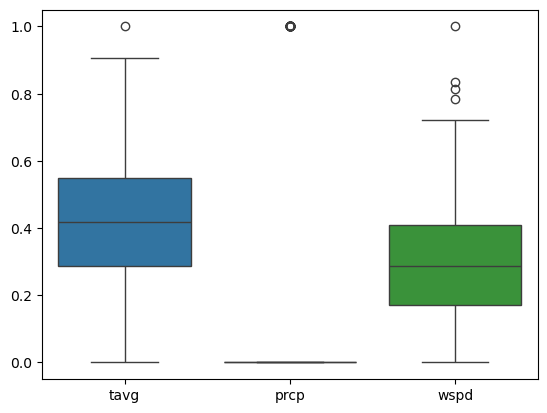

In [ ]:
#vemos como se distribuyen los datos escalados
sns.boxplot(X_scaled)

In [ ]:
modelo_bicis=linear_model.LinearRegression()
modelo_bicis.fit(X_scaled,y)
y_pred=modelo_bicis.predict(X_scaled)


In [ ]:
modelo_bicis.score(X_scaled,y) #dio un valor muy bajo

0.15486794424921857

In [ ]:
modelo_bicis.coef_

array([[277.07496299,  -4.3740608 , 171.46924411]])

Vamos a agregar para ver si mejora el dato si es dia de semana o no, tambien lo pasamos a binario, donde 1 es si es un dia de
semana y 0 en caso contrario
-

In [ ]:
explicativas=["dia_semana","tavg","prcp","wspd"]
X1=bicis_y_clima[explicativas].copy()

In [ ]:
finDeSemana=["Sabado","Domingo"]

In [ ]:
X1["dia_semana"]=(~X1["dia_semana"].isin(finDeSemana)).astype(int)# hacemos la transformacion
X1

,dia_semana,tavg,prcp,wspd
0,1,16.9,0.0,5.6
1,1,16.6,0.0,6.3
2,1,18.0,0.0,8.9
3,1,18.2,0.0,13.7
4,1,19.0,0.0,4.7
...,...,...,...,...
243,0,29.2,0.1,14.5
244,0,27.7,0.0,18.5
245,1,27.7,0.0,10.3
246,1,29.7,0.0,11.9


In [ ]:
#vemos cuantos dias de semana y fin de semana quedaron
X1["dia_semana"].value_counts()

dia_semana
1    178
0     70
Name: count, dtype: int64

In [ ]:
X1["prcp"]=(X1["prcp"]>2).astype(int) #cambio esta columna a 1 y ceros dependiendo si llovió o no
X1

,dia_semana,tavg,prcp,wspd
0,1,16.9,0,5.6
1,1,16.6,0,6.3
2,1,18.0,0,8.9
3,1,18.2,0,13.7
4,1,19.0,0,4.7
...,...,...,...,...
243,0,29.2,0,14.5
244,0,27.7,0,18.5
245,1,27.7,0,10.3
246,1,29.7,0,11.9


Ahora le aplicamos un reescalamiento de igual manera que antes

In [ ]:
scaler = MinMaxScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame

In [ ]:
# fit_transform calcula los coeficientes de la transformación y la aplica.
X1_scaled = scaler.fit_transform(X1)

In [ ]:
modelo_bicis2=linear_model.LinearRegression()
modelo_bicis2.fit(X1_scaled,y)
y_prediccion=modelo_bicis2.predict(X1_scaled)


In [ ]:
modelo_bicis2.score(X1_scaled,y)

0.15759273942133278

Vamos a nalizar como quedaron los coeficientes del ajuste, el primer coeficiente es sobre si es dia de semana o no, el segundo es la temperarura ,tercero las precipitaciones y cuarto la velocidad del viento
-

In [ ]:
modelo_bicis2.coef_

array([[-18.5451215 , 278.29167641,  -6.42841777, 167.97730727]])

Analizamos los residuos de ambos modelos. creamos un nuevo dataframe con la variable a explicar, las predicciones de ambos modelos y el residuo de estos

In [ ]:
residuos=pd.DataFrame()


In [ ]:
residuos["Mediciones"]=y
residuos["Predicciones_primer_modelo"]=y_pred
residuos["Predicciones_seg_modelo"]=y_prediccion

In [ ]:

residuos["Residuos_modelo1"]=residuos["Mediciones"]-residuos["Predicciones_primer_modelo"]
residuos["Residuos_modelo2"]=residuos["Mediciones"]-residuos["Predicciones_seg_modelo"]

In [ ]:
residuos.head()

,Mediciones,Predicciones_primer_modelo,Predicciones_seg_modelo,Residuos_modelo1,Residuos_modelo2
0,15,408.230045,408.230045,-393.230045,-393.230045
1,208,409.560607,409.560607,-201.560607,-201.560607
2,237,439.581718,439.581718,-202.581718,-202.581718
3,81,471.219695,471.219695,-390.219695,-390.219695
4,252,423.618658,423.618658,-171.618658,-171.618658


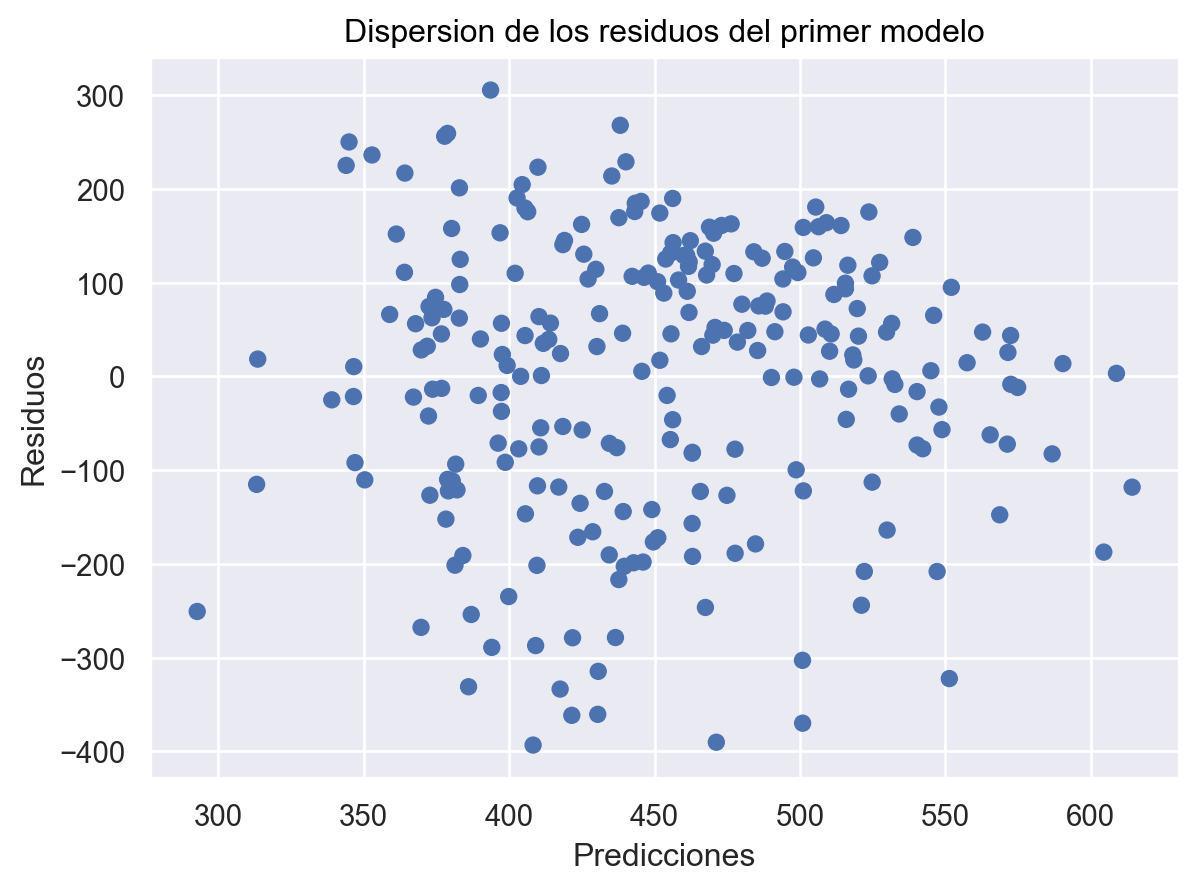

In [ ]:
(
    so.Plot(residuos,"Predicciones_primer_modelo","Residuos_modelo1")
    .add(so.Dot())
    .label(title="Dispersion de los residuos del primer modelo",x="Predicciones",y="Residuos")
)

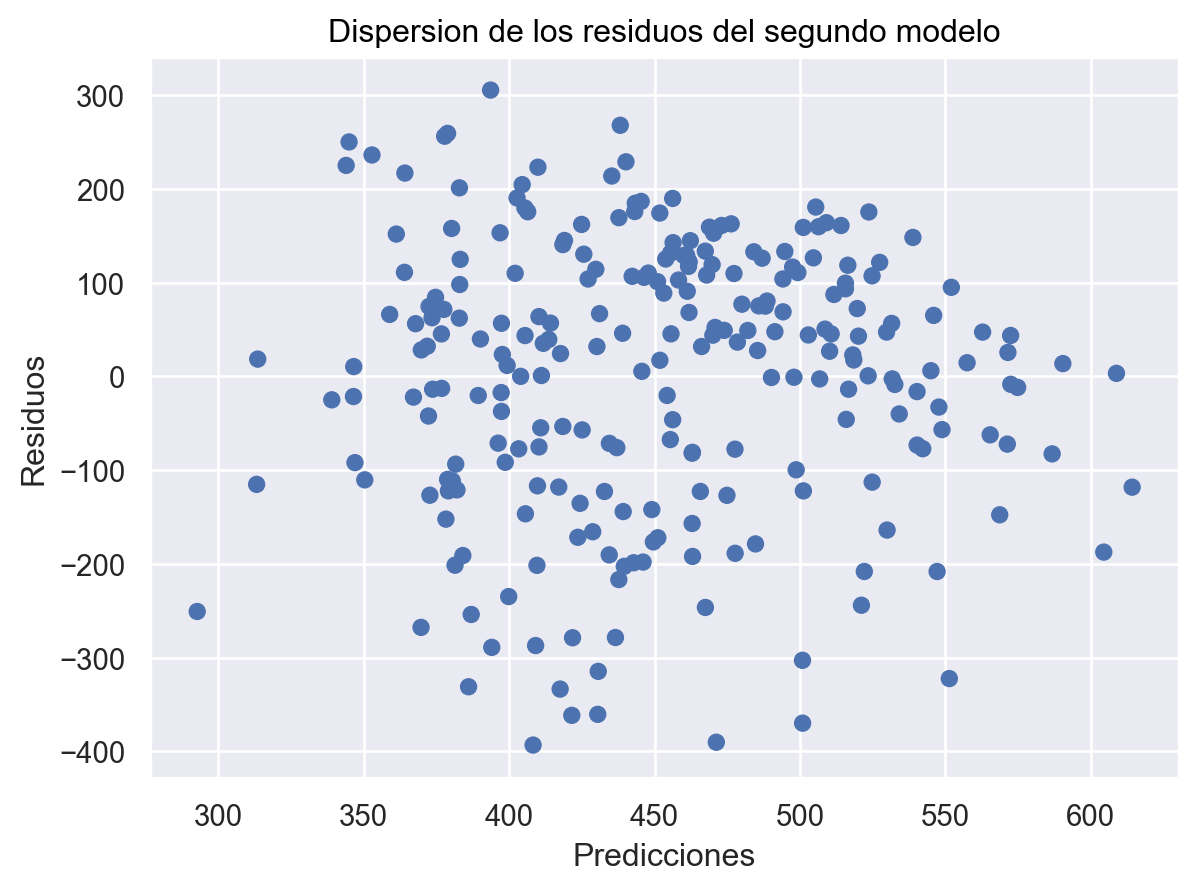

In [ ]:
(
    so.Plot(residuos,"Predicciones_seg_modelo","Residuos_modelo2")
    .add(so.Dot())
    .label(title="Dispersion de los residuos del segundo modelo",x="Predicciones",y="Residuos")
)

#Esto hay que mirarlo, puede ser cualquier chamuyo y esta mal redactado xd
El modelo dio un bajo valor de R**2 (aprox 0.1545 para el primer modelo, y 0.1579 para el segundo) para ambos modelos,por lo tanto una baja capacidad de explicar la variación de la variable dependiente en base a las variables explicativas usadas,podriamos pensar que otros factores sociales juegan un rol importante a la hora de predecir el uso de las bicis, pueden ser cortes de calle, paro de trasnportes, eventos deportivos o de otro tipo en los estadios circundantes; debemos mencionar que las variables de precion atmosfeica y estacion del año no la utilizamos porque estan relacionadas con las demas variables, a rescatar es que la variable con mayor importancia a la hora de analizar la cantidad de puertos disponibles es la temperatura, hay mas puertos libres a mayor temperatura promedio,debemos mencionar que la temperatura max promedio es de 32.2°; luego nos dio que si es dia de semana, habra menos puertos libres, es decir ocupados de bicis y por ende con un mayor flujo de usuarios; el coef de las precipitaciones nos dio un valor negativo tambien, esto podemos explicarlo que por la lluvia, las bicis ocupan los lugares sin moverse de ahi en todo el dia

In [ ]:
rmse1 = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse1:.5f}")
rmse2 = np.sqrt(mean_squared_error(y, y_prediccion))
print(f"Raíz del Error Cuadrático Medio: {rmse2:.5f}")

Raíz del Error Cuadrático Medio: 145.52410
Raíz del Error Cuadrático Medio: 145.52410


# Regresión lineal

En esta sección, queremos analizar el uso de bicis en otras estaciones de la Ciudad. Para eso vamos
a utilizar el dataset viajes-por-dia.csv con la cantidad de viajes por hora realizados desde cada
estación y cantidad de viajes por hora realizados hacia cada estación.


El objetivo es modelar la variable origen_5, correspondiente a la estación 005 - Plaza Italia.

In [69]:
# Cargamos el dataset viajes_diarios.csv, que contiene la cantidad de viajes por hora con origen y destino en distintas estaciones de la ciudad:

viajes = pd.read_csv("viajes_diarios.csv")

viajes.head()

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0


Hacemos una inspección del DataFrame para verificar:

  - Tipos de variables

  - Cantidad de observaciones

  - Existencia de valores faltantes

In [49]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Columns: 794 entries, fecha to destino_577
dtypes: int64(793), object(1)
memory usage: 2.2+ MB


In [70]:
# Reviso los tipos de datos en viajes:

viajes.dtypes

,0
fecha,object
origen_2,int64
origen_3,int64
origen_4,int64
origen_5,int64
...,...
destino_573,int64
destino_574,int64
destino_575,int64
destino_576,int64


Se observa que La columna fecha es de tipo object y el resto de las variables son de tipo int64.

In [74]:
# Revisamos si hay valores faltantes:

print(viajes.isna().sum())

print("La suma de la cantidad de datos faltantes en todas las columnas es", viajes.isna().sum().sum())

fecha          0
origen_2       0
origen_3       0
origen_4       0
origen_5       0
              ..
destino_573    0
destino_574    0
destino_575    0
destino_576    0
destino_577    0
Length: 794, dtype: int64
La suma de la cantidad de datos faltantes en todas las columnas es 0


No se observan datos faltantes, por lo que no es necesario realizar una limpieza adicional.

##Ejercicio 15

Se quiere ajustar la cantidad de viajes con origen en la estación 005 - Plaza Italia en función de
viajes originados en otras estaciones o con destino en distintas estaciones. Es decir, queremos
hacer un modelo para ajustar la variable origen_5 en función de otras variables del DataFrame.

In [57]:
# Verifico que esté presente la variable a modelar, origen_5:

viajes.columns


Index(['fecha', 'origen_2', 'origen_3', 'origen_4', 'origen_5', 'origen_6',
       'origen_7', 'origen_8', 'origen_9', 'origen_12',
       ...
       'destino_567', 'destino_568', 'destino_569', 'destino_570',
       'destino_572', 'destino_573', 'destino_574', 'destino_575',
       'destino_576', 'destino_577'],
      dtype='object', length=794)

Se define como variable dependiente a la cantidad de viajes con origen en la estación 005 - Plaza Italia (origen_5).

Para definir las variables explicativas:

  - Se excluye origen_5 porque es la variable dependiente.

  - Se excluye fecha porque es una variable categórica (tipo object) y no forma parte del modelo explicativo solicitado.

Se utilizan las demás variables numéricas disponibles como posibles variables explicativas.

In [75]:
# Definimos la variable dependiente:

variable_objetivo = viajes["origen_5"]

In [76]:
# Definimos las variables explicativas:

variables_explicativas = viajes.drop(columns=["origen_5", "fecha"])

In [78]:
# Inicializamos el modelo de regresión lineal multiple:

modelo = linear_model.LinearRegression()

In [80]:
# Ajustamos el modelo:

modelo.fit(variables_explicativas, variable_objetivo)

LinearRegression()

In [82]:
# Vemos el intercepto y el número de coeficientes:

print("Intercepto:", modelo.intercept_)
print("Cantidad de coeficientes estimados:", len(modelo.coef_))

Intercepto: -0.4523294028749234
Cantidad de coeficientes estimados: 792


In [83]:
# Se calcula el coeficiente de determinación R² para medir qué proporción de la variabilidad de origen_5 es explicada por el modelo.
# También se calcula el Error Cuadrático Medio (MSE), que mide el error promedio de las predicciones.

predicciones = modelo.predict(variables_explicativas)

r2 = r2_score(variable_objetivo, predicciones)
mse = mean_squared_error(variable_objetivo, predicciones)

print("R²:", r2)
print("MSE:", mse)

R²: 1.0
MSE: 1.1570866055603677e-25


El modelo presenta un R² igual a 1 y un MSE prácticamente nulo.
Esto indica un ajuste perfecto sobre los datos de entrenamiento.

Sin embargo, este resultado sugiere un fuerte sobreajuste, ya que se están utilizando 792 variables explicativas para explicar una sola variable respuesta.
Además, el desempeño se está evaluando sobre el mismo conjunto de datos utilizado para entrenar el modelo.

Por lo tanto, si bien el ajuste es perfecto en muestra, no podemos garantizar su capacidad predictiva fuera de muestra.



A continuación realizamos el análisis limitando a 5 el número de variables explicativas, usando validación (Si? revisar) y comparando distintos modelos.



Queremos utilizar un modelo lineal:
$$ origen_5 = \beta_0 + \beta_1 destino_A + \beta_2 destino_B + ...$$




15. Se quiere ajustar la cantidad de viajes con origen en la estación 005 - Plaza Italia en función de
viajes originados en otras estaciones o con destino en distintas estaciones. Es decir, queremos
hacer un modelo para ajustar la variable origen_5 en función de otras variables del DataFrame.


In [ ]:
# Saco los de fecha por no ser un dato númerico:

viajes_numericos = viajes.drop(columns=["fecha"])

In [ ]:
# Hice trampa, busqué como sacar la matriz de correlación para ver cuales variables se correlacionaban mejor, así no tenía que hacer a mano muchas combinaciones y ver como se comportaban. A partir de eso, dejo tres propuestas. Cuando puedan las discutimos:

# Modelo 1: Las de las variables que mostraron mayor correlación.
# Criterio: usar las 5 variables con mayor correlación con origen_5. Se seleccionaron las variables con mayor correlación lineal con la variable objetivo.
# Utilizo como variables a: destino_5, destino_29, origen_29, origen_9, destino_14.

# Modelo 2: Solo estaciones distintas para origen y destino, excluyendo a destino_5.
# Criterio: Sacar a  destino_5 para evitar una dependencia muy marcada, dado que está directamente relacionada con lo que sucede en origen_5. Se excluyó destino_5 para evaluar la capacidad predictiva basada en estaciones relacionadas.
# Utilizo como variables a: destino_29, origen_29 ,origen_9, destino_14, origen_14.

# Modelo 3: Mezcla de origenes y destinos.
# Criterio: usar las 5 variables con mayor correlación con origen_5. Se seleccionaron estaciones con alta correlación, balanceando orígenes y destinos.
# Utilizo como variables a: origen_29, origen_9, origen_14, destino_9, destino_277.

In [ ]:
# Modelo 1

In [ ]:
# Defino variables:

# Variable objetivo
variable_objetivo = viajes["origen_5"]

# Variables explicativas del Modelo 1
variables_modelo_1 = viajes[[
    "destino_5",
    "destino_29",
    "origen_29",
    "origen_9",
    "destino_14"
]]


In [ ]:
# Inicializamos el modelo de regresión:

modelo_1 = linear_model.LinearRegression()


#Ajusto el modelo:

modelo_1.fit(variables_modelo_1, variable_objetivo)

LinearRegression()

In [ ]:
# Mostramos coeficientes

print("Coeficientes:", modelo_1.coef_)
print("Intercepto:", modelo_1.intercept_)

Coeficientes: [ 0.94688047  0.08554209 -0.03869064  0.02296074  0.0092587 ]
Intercepto: -0.9009818925875521


In [ ]:
# Predicciones para todos los datos

y_pred_1 = modelo_1.predict(variables_modelo_1)

# Mostramos las primeras
display(y_pred_1[:10])


array([ 52.96502857, 120.1942539 , 121.73005814,  94.24551813,
        85.46761575,  72.17595917,  40.69958228, 131.33242832,
       107.62852889, 100.08202836])

In [ ]:
# R2

modelo_1.score(variables_modelo_1, variable_objetivo)

# También manualmente
r2_score(variable_objetivo, y_pred_1)

# Error cuadrático medio
mean_squared_error(variable_objetivo, y_pred_1)

# Raíz del ECM

root_mean_squared_error(variable_objetivo, y_pred_1)




8.752293551815217

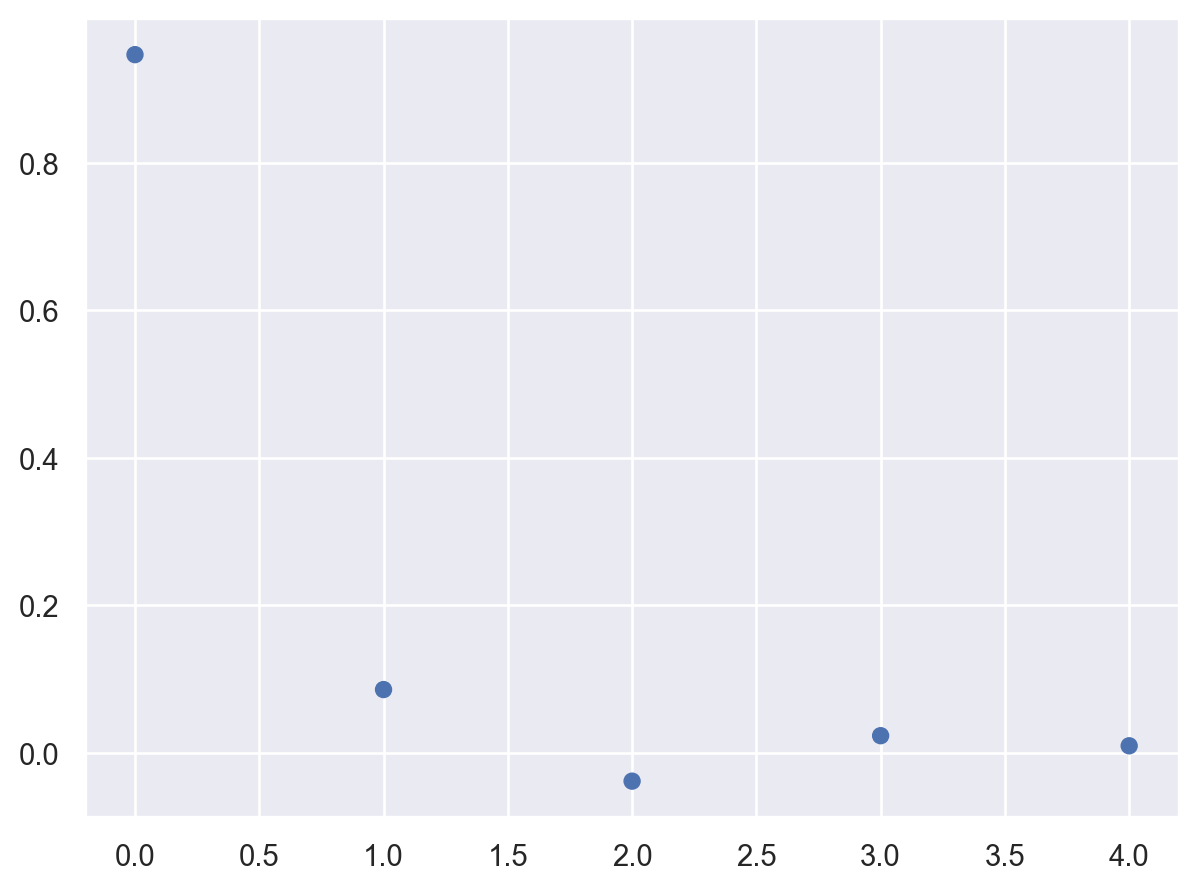

In [ ]:
so.Plot(x = np.arange(len(modelo_1.coef_)), y = modelo_1.coef_).add(so.Dot())

In [ ]:
# Modelo 2:

In [ ]:
# Defino variables:

# Variable objetivo:

variable_objetivo = viajes["origen_5"]


# Variables explicativas del Modelo 2:
variables_modelo_2 = viajes[[
    "destino_29",
    "origen_29",
    "origen_9",
    "destino_14",
    "origen_14"
]]

In [ ]:
# Inicializamos el modelo de regresión:

modelo_2 = linear_model.LinearRegression()


#Ajusto el modelo:

modelo_2.fit(variables_modelo_2, variable_objetivo)

LinearRegression()

In [ ]:
# Mostramos coeficientes

print("Coeficientes:", modelo_2.coef_)
print("Intercepto:", modelo_2.intercept_)

Coeficientes: [0.39614328 0.11997092 0.31523053 0.17551252 0.05256994]
Intercepto: 12.872483303531894


In [ ]:
# Predicciones para todos los datos

y_pred_2 = modelo_2.predict(variables_modelo_2)

# Mostramos las primeras
display(y_pred_2[:10])


array([ 61.72405178,  94.85032833,  97.28974824, 101.16848067,
        98.5095042 ,  55.37302471,  43.8767241 , 109.16543085,
        99.56661171,  82.75762765])

In [ ]:
# R2

modelo_2.score(variables_modelo_2, variable_objetivo)

# También manualmente
r2_score(variable_objetivo, y_pred_2)

# Error cuadrático medio
mean_squared_error(variable_objetivo, y_pred_2)

# Raíz del ECM

root_mean_squared_error(variable_objetivo, y_pred_2)


22.64223995427854

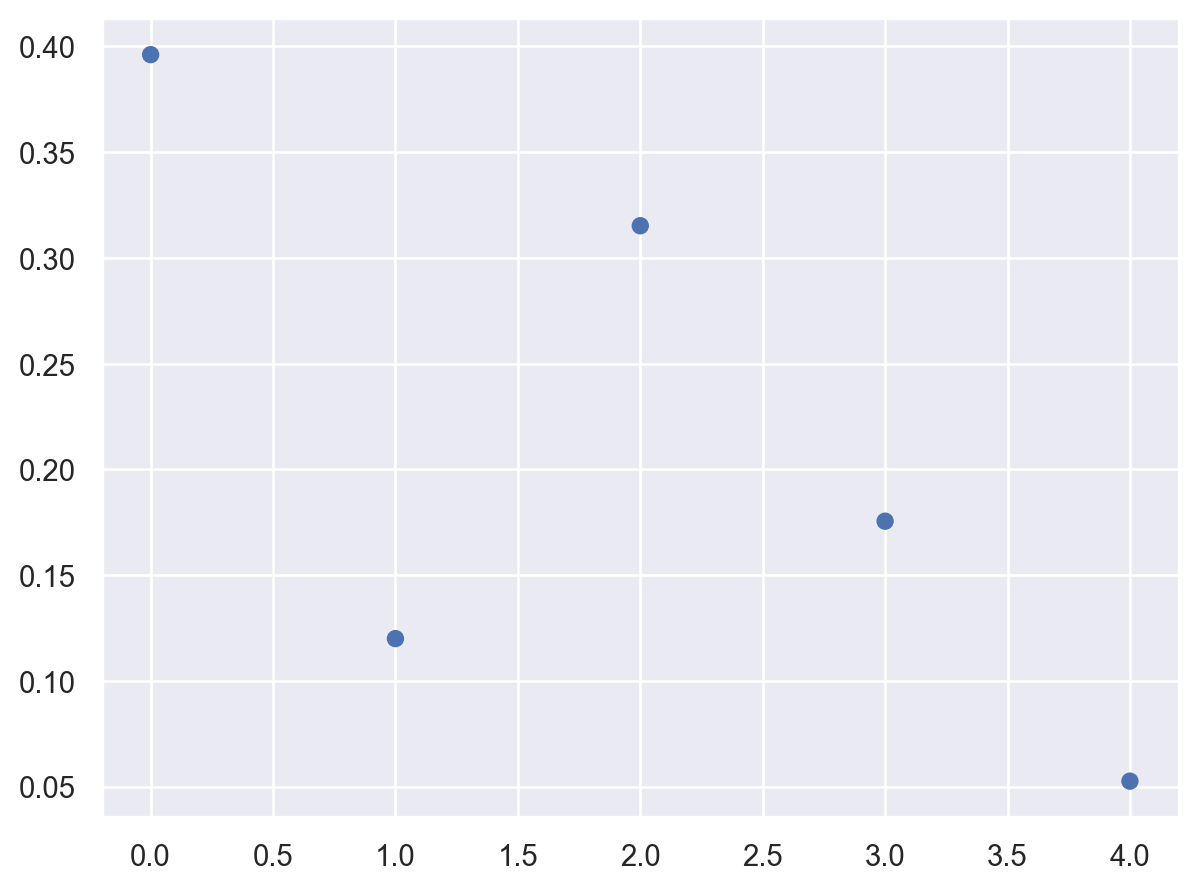

In [ ]:
so.Plot(x = np.arange(len(modelo_2.coef_)), y = modelo_2.coef_).add(so.Dot())

In [ ]:
# Modelo 3

In [ ]:
# Defino variables:

variables_modelo_3 = viajes[[
    "origen_29",
    "origen_9",
    "origen_14",
    "destino_9",
    "destino_277"
]]

In [ ]:
# Inicializamos el modelo de regresión:

modelo_3 = linear_model.LinearRegression()


#Ajusto el modelo:

modelo_3.fit(variables_modelo_3, variable_objetivo)

LinearRegression()

In [ ]:
# Mostramos coeficientes

print("Coeficientes:", modelo_3.coef_)
print("Intercepto:", modelo_3.intercept_)

Coeficientes: [0.3457955  0.25448456 0.14259871 0.01749266 0.37862318]
Intercepto: 11.694525400599929


In [ ]:
# Predicciones para todos los datos

y_pred_3 = modelo_3.predict(variables_modelo_3)

# Mostramos las primeras
display(y_pred_3[:10])

array([ 67.78510985,  95.86196235, 115.51318893, 108.24351779,
       117.99036933,  59.02314753,  39.36583627, 121.02223902,
       118.41830135,  90.63936092])

In [ ]:
# R2

modelo_3.score(variables_modelo_3, variable_objetivo)

# También manualmente
r2_score(variable_objetivo, y_pred_3)

# Error cuadrático medio
mean_squared_error(variable_objetivo, y_pred_3)

# Raíz del ECM

root_mean_squared_error(variable_objetivo, y_pred_3)

22.132054590290064

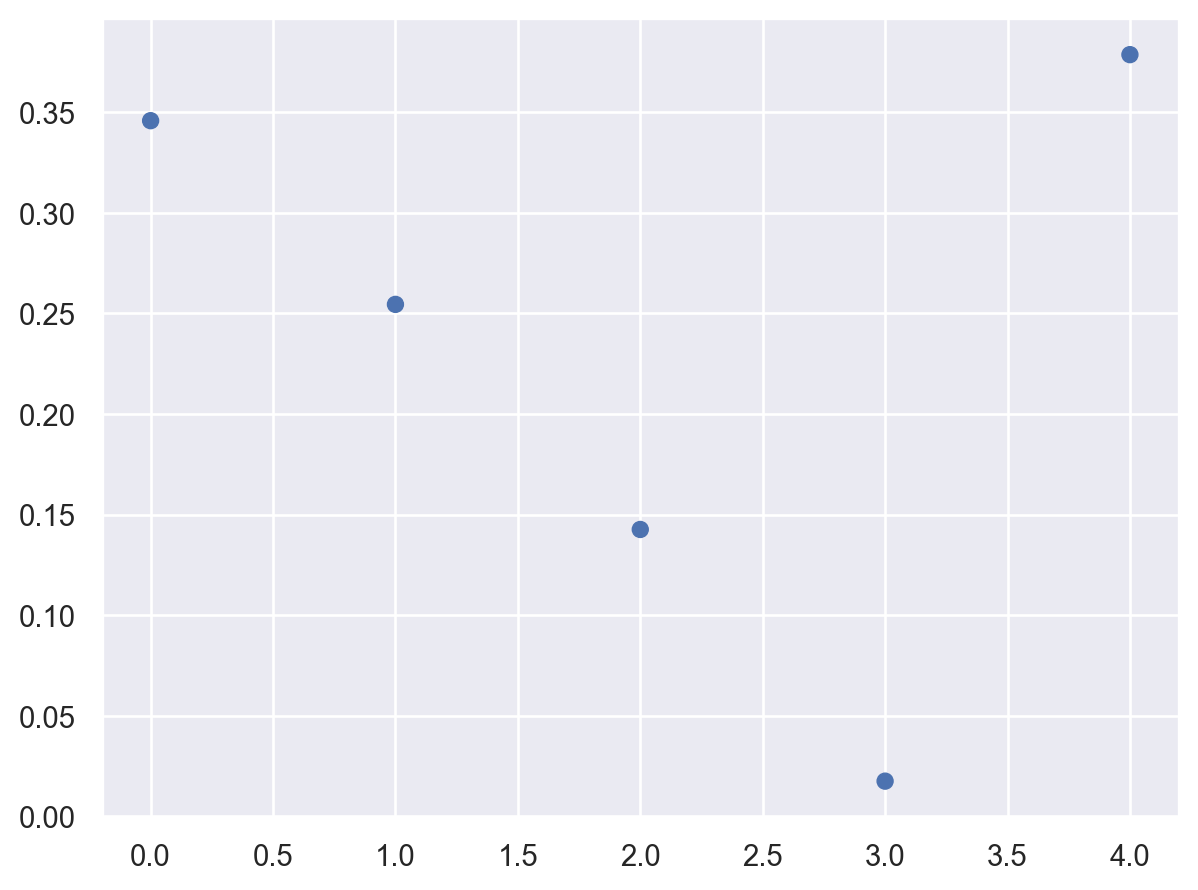

In [ ]:
so.Plot(x = np.arange(len(modelo_3.coef_)), y = modelo_3.coef_).add(so.Dot())

In [ ]:
# Hasta ahora, de los tres modelos, tengo:

print("MODELO 1")
print("R2:", r2_score(variable_objetivo, y_pred_1))
print("MSE:", mean_squared_error(variable_objetivo, y_pred_1))
print("RMSE:", root_mean_squared_error(variable_objetivo, y_pred_1))

print("MODELO 2")
print("R2:", r2_score(variable_objetivo, y_pred_2))
print("MSE:", mean_squared_error(variable_objetivo, y_pred_2))
print("RMSE:", root_mean_squared_error(variable_objetivo, y_pred_2))

print("MODELO 3")
print("R2:", r2_score(variable_objetivo, y_pred_3))
print("MSE:", mean_squared_error(variable_objetivo, y_pred_3))
print("RMSE:", root_mean_squared_error(variable_objetivo, y_pred_3))


MODELO 1
R2: 0.9525750138544266
MSE: 76.60264241714624
RMSE: 8.752293551815217
MODELO 2
R2: 0.6826034228745843
MSE: 512.6710301471276
RMSE: 22.64223995427854
MODELO 3
R2: 0.6967457282009184
MSE: 489.82784038757944
RMSE: 22.132054590290064


17. Propongan un esquema de validaci´on de los modelos y utilizarlo para seleccionar el mejor de
los tres modelos propuestos.
Importante: Pueden utilizar cualquier criterios para la elecci´on de las variables de cada
modelo, no se pide buscar las 5 mejores variables entre todas las disponibles. Lo que s´ı tienen
que hacer es explicar entre los 3 modelos que proponen c´omo seleccionan el mejor de ellos

> Add blockquote



In [ ]:
# Ni idea por ahora. De momento dejo opciones de texto contando que se tiene con las métricas y analizando:


Para comparar los tres modelos propuestos se utilizó un esquema de validación basado en métricas de desempeño predictivo calculadas sobre los mismos datos utilizados para el ajuste. En particular, se evaluaron los siguientes indicadores:

- Coeficiente de determinación (R²)

- Error Cuadrático Medio (MSE)

- Raíz del Error Cuadrático Medio (RMSE)

El coeficiente R² permite medir qué proporción de la variabilidad de la variable objetivo (origen_5) es explicada por el modelo. Por su parte, el MSE y el RMSE cuantifican el error promedio de predicción, siendo deseable que estos valores sean lo más bajos posibles.

Se ajustaron los tres modelos utilizando LinearRegression de scikit-learn y se calcularon las métricas correspondientes a cada uno. La comparación mostró que:

El Modelo 1 presentó el mayor R² (0.95) y los menores valores de MSE y RMSE.

Los Modelos 2 y 3 presentaron valores de R² significativamente menores (≈ 0.68–0.70) y errores considerablemente más altos.

En consecuencia, bajo el criterio de maximizar la capacidad explicativa y minimizar el error de predicción, el Modelo 1 fue seleccionado como el mejor entre los tres propuestos.

No obstante, se destaca que el Modelo 1 incluye la variable destino_5, que presenta una correlación muy alta con origen_5, lo que puede explicar en gran medida su desempeño superior. Por lo tanto, aunque es el modelo con mejor ajuste estadístico, parte de su poder predictivo se debe a la fuerte relación estructural entre los flujos de entrada y salida de la misma estación.



Se propusieron tres modelos de regresión lineal para ajustar la cantidad de viajes con origen en la estación 005 – Plaza Italia (origen_5), utilizando hasta cinco variables explicativas en cada caso. Los modelos fueron comparados mediante el coeficiente de determinación (R²), el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE).

El Modelo 1 presentó un desempeño significativamente superior (R² = 0.95), explicando aproximadamente el 95% de la variabilidad de la variable objetivo y mostrando un error considerablemente menor que los otros modelos. Este modelo incluye como variable explicativa destino_5, la cual presenta una correlación muy alta con origen_5. Por lo tanto, si el criterio principal es maximizar la capacidad predictiva del modelo, el Modelo 1 sería el elegido, ya que ofrece el mejor ajuste y el menor error. Sin embargo, este resultado puede explicarse en parte por la fuerte dependencia estructural entre los flujos de entrada y salida en Plaza Italia, lo que implica que el modelo está capturando un fenómeno casi simétrico más que relaciones entre estaciones distintas.

El Modelo 2 excluye la variable destino_5 y utiliza únicamente variables asociadas a otras estaciones. Este modelo presenta un R² de aproximadamente 0.68, con errores considerablemente mayores. Si el objetivo fuera analizar la capacidad predictiva basada exclusivamente en la interacción entre estaciones distintas, evitando la relación casi directa entre origen y destino en la misma estación, podría elegirse este modelo. No obstante, su menor desempeño indica que las estaciones seleccionadas explican una proporción más limitada de la variabilidad en los viajes originados en Plaza Italia.

El Modelo 3 también excluye destino_5, pero propone una combinación diferente de variables explicativas, equilibrando orígenes y destinos de otras estaciones. Este modelo mejora ligeramente el desempeño respecto al Modelo 2 (R² ≈ 0.70), manteniendo un error similar aunque algo menor. Si el criterio fuera priorizar una interpretación más estructural del sistema de movilidad —es decir, analizar cómo otras estaciones influyen en Plaza Italia sin recurrir a su flujo de retorno directo— el Modelo 3 resultaría una alternativa razonable, ya que presenta el mejor desempeño entre los modelos que no utilizan la variable altamente correlacionada.

En conclusión, si el objetivo principal es la máxima precisión predictiva, el Modelo 1 es claramente superior. Sin embargo, si se busca un modelo más interpretativo que capture relaciones entre distintas estaciones y no dependa de la fuerte correlación interna de Plaza Italia, el Modelo 3 es más adecuado.

18. Para el modelo elegido, indiquen la f´ormula final de modelo.



El modelo seleccionado fue el Modelo 1, ya que presentó el mayor coeficiente de determinación (R² = 0.95) y los menores valores de error, mostrando el mejor desempeño predictivo entre los tres modelos propuestos.

La ecuación estimada del modelo de regresión lineal múltiple es:

$$
\hat{origen\_5}
=
\beta_0
+
\beta_1 destino\_5
+
\beta_2 destino\_29
+
\beta_3 origen\_29
+
\beta_4 origen\_9
+
\beta_5 destino\_14
$$

donde:

- El intercepto estimado es \(-0.90098\).
- Cada coeficiente indica el cambio esperado en la cantidad de viajes con origen en Plaza Italia ante un aumento de una unidad en la variable correspondiente, manteniendo las demás constantes.

Se observa que la variable `destino_5` tiene el coeficiente más alto (0.94688), lo cual es consistente con la fuerte correlación observada entre los flujos de entrada y salida en la misma estación.
